In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns

In [3]:
from matplotlib import rcParams
#rcParams['font.family'] = 'Arial'
%matplotlib inline

In [4]:
from cdcp.experiment_info import subjects
from cdcp.paths import DATA_PATH_MAGPI
from cdcp.behavior.data import prepare_behavior_data
from cdcp.visualization.colors import colors
subjects, DATA_PATH_MAGPI
from cdcp.paths import DATA_PATH_MAGPI, FIGURE_DIR, ensure_dir
from cdcp.general import save_fig

/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/general.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
from cdcp.paths import DATA_DIR, ensure_dir

In [6]:
import scipy.stats

In [7]:
from cdcp.visualization.colors import colors as cdcp_colors

In [8]:
from cdcp.behavior.data import bin_data, cue_direction

In [9]:
SAVE_FIGS = True

## Plot relationship between reaction time and stimulus

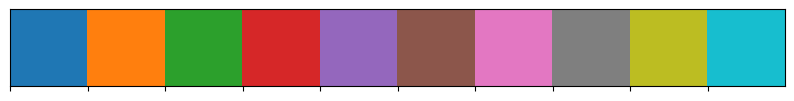

In [10]:
pal = sns.color_palette('tab10', 10)
sns.palplot(pal)

In [11]:
## Runs the plotting code on my data
#behav_data = loading.load_data_pandas(subjects,DATA_PATH_MAGPI)
#for key, value in tqdm(behav_data.items(), total = len(behav_data)):
#    behav_data[key], bins = prepare_behavior_data(value, num_bins=25)

### load data

In [12]:
def prepare_behavior_data(data, num_bins=16, num_prev=np.inf):
    """ parses information from raw bahav_data dataframes
    """
    # subset normal trials
    data = data[data["response"] != "none"]
    
    # Subset part of the dataset
    if num_prev != np.inf:
        data = data[-num_prev:]

    # Extract the response as a boolean
    data["response_bool"] = 0
    data.loc[data["response"] == "L", "response_bool"] = 1
    
    # flip interpolation 0-127 so 0 corresponds to left, and 127 corresponds to right (to make it easier to read)
    #data['interpolation_point'] = 127 - data['interpolation_point']
    data['response_bool'] = 1 - data['response_bool'] 

    # specify interpolation info
    data["interpolation"] = [
        ls + rs for ls, rs in zip(data.left_stim.values, data.right_stim.values)
    ]

    # bin data into 32 equally sized bins
    data["pos_bin"], bins = bin_data(
        data["interpolation_point"].values.astype("float32"), num_bins
    )
    data["cue_direction"] = data.cue_id.apply(cue_direction)
    return data, bins

In [13]:
# grab the final nex trials for each subject
total_trials = 0
nex = 1000000
behav_data_all = []
for subject in tqdm(subjects):
    # load data
    behav_data_subject = pd.read_pickle(
        DATA_DIR / "behavior" / "subject_behavior_dfs" / f"{subject}.pickle.zip",
        compression="zip",
    )
    # prep dataset
    behav_data_subject, bins = prepare_behavior_data(behav_data_subject, num_bins=32)

    print(subject, len(behav_data_subject))

    # get trial count
    total_trials += len(behav_data_subject)

    behav_data_subject = behav_data_subject[behav_data_subject.rt.isnull() == False]
    
    # skip trials where the choice is still binary
    behav_data_subject = behav_data_subject[5000:] 
    if True:
        skip_point = np.where(
            behav_data_subject#.sort_values(by="time")
            .interpolation_point.isin([0, 127])
            .values
            == False
        )[0][0]
        behav_data_subject = behav_data_subject[skip_point:]

    # get the most recent NEX trials
    behav_data_subject = behav_data_subject[-nex:]
    behav_data_subject["subject"] = subject
    behav_data_all.append(behav_data_subject)
    
    
    
behav_data_all = pd.concat(behav_data_all)
behav_data_all = behav_data_all[behav_data_all.rt >= 0]

  0%|          | 0/20 [00:00<?, ?it/s]/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

B1174 444899


  5%|▌         | 1/20 [00:02<00:52,  2.78s/it]/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

B1426 424782


 10%|█         | 2/20 [00:05<00:51,  2.86s/it]/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

B1170 586050


 15%|█▌        | 3/20 [00:09<00:59,  3.50s/it]/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

B1432 822151


 20%|██        | 4/20 [00:15<01:11,  4.48s/it]/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

B1437 108765


/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1433 227809


/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1597 271881


/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1427 457989


 40%|████      | 8/20 [00:21<00:27,  2.29s/it]/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

B1188 99807


/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1244 301779


/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1590 215348


/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1399 147911


/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1591 189463


/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1252 231626


/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1110 163466


/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1390 156954


/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1248 224734


/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1593 394567


 90%|█████████ | 18/20 [00:33<00:02,  1.46s/it]/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

B1595 120982


/tmp/ipykernel_20884/3664274659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["response_bool"] = 0
/tmp/ipykernel_20884/3664274659.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response_bool'] = 1 - data['response_bool']
/tmp/ipykernel_20884/3664274659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

B1276 203416


### norm mean from reaction time to account for side bias

In [14]:
def z_score(x):
    return (x - np.nanmean(x)) / np.nanstd(x)

In [15]:
behav_data_all[:3]

session index   type_  \
time                                               
2019-04-12 07:22:03.913804       1     1  normal   
2019-04-12 07:59:15.341180       1    10  normal   
2019-04-12 07:59:19.565336       1    11  normal   

                                                                     stimulus  \
time                                                                            
2019-04-12 07:22:03.913804  /home/bird/opdat/B1174/stimuli/CF/NC/NC_CF_091...   
2019-04-12 07:59:15.341180  /home/bird/opdat/B1174/stimuli/BF/NC/NC_BF_018...   
2019-04-12 07:59:19.565336  /home/bird/opdat/B1174/stimuli/AG/NC/NC_AG_036...   

                           class_ response correct        rt  reward punish  \
time                                                                          
2019-04-12 07:22:03.913804      L        L    True  1.607013    True  False   
2019-04-12 07:59:15.341180      R        R    True  0.687282   False  False   
2019-04-12 07:59:19.565336      R        L   False  0.750403   False   True   

                           cue_class cue_id  cue_prob num_stims flip_cues  \
time                                                                        
2019-04-12 07:22:03.913804        NC     NC       0.5         3     False   
2019-04-12 07:59:15.341180        NC     NC       0.5         3     False   
2019-04-12 07:59:19.565336        NC     NC       0.5         3     False   

                           binary_choice cueing left_stim right_stim  \
time                                                                   
2019-04-12 07:22:03.913804         False  False         C          F   
2019-04-12 07:59:15.341180         False  False         B          F   
2019-04-12 07:59:19.565336         False  False         A          G   

                           interpolation_point  prob_cue  prob_cued_no_cue  \
time                                                                         
2019-04-12 07:22:03.913804                  36       0.0               0.0   
2019-04-12 07:59:15.341180                 109       0.0               0.0   
2019-04-12 07:59:19.565336                  91       0.0               0.0   

                                                                    data_file  \
time                                                                            
2019-04-12 07:22:03.913804  /mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...   
2019-04-12 07:59:15.341180  /mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...   
2019-04-12 07:59:19.565336  /mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...   

                            response_bool interpolation  pos_bin  \
time                                                               
2019-04-12 07:22:03.913804              0            CF        9   
2019-04-12 07:59:15.341180              1            BF       27   
2019-04-12 07:59:19.565336              0            AG       23   

                           cue_direction subject self_initiated  
time                                                             
2019-04-12 07:22:03.913804             N   B1174            NaN  
2019-04-12 07:59:15.341180             N   B1174            NaN  
2019-04-12 07:59:19.565336             N   B1174            NaN

In [16]:
rt_correct = behav_data_all[behav_data_all.correct == True].rt.values
rt_incorrect = behav_data_all[behav_data_all.correct == False].rt.values

In [17]:
np.sum(behav_data_all.correct == True)

4469740

In [18]:
np.sum(behav_data_all.correct == False)

877728

In [19]:
len(behav_data_all)

5347468

In [20]:
np.mean(rt_correct), np.mean(rt_incorrect)

(0.6056716304409208, 0.9813823521409824)

In [21]:
scipy.stats.ttest_ind(rt_correct, rt_incorrect)

Ttest_indResult(statistic=-404.5309101907178, pvalue=0.0)

In [22]:
from scipy.ndimage import gaussian_filter1d

In [23]:
bins = np.linspace(0,5, 500)
#bins = np.logspace(-1,0.6989700043360189, 500, base=10)
bins[[0, -1]]

array([0., 5.])

In [24]:
correct_density, correct_bin = np.histogram(rt_correct, bins=bins, density=True)
incorrect_density, incorrect_bin = np.histogram(rt_incorrect, bins=bins, density=True)
correct_density = correct_density / np.sum(correct_density)
incorrect_density = incorrect_density / np.sum(incorrect_density)

In [25]:
np.max(correct_density)

0.054716605440137456

In [26]:
correct_gauss_100 = gaussian_filter1d(correct_density, sigma = 5)
incorrect_gauss_100 = gaussian_filter1d(incorrect_density, sigma = 5)

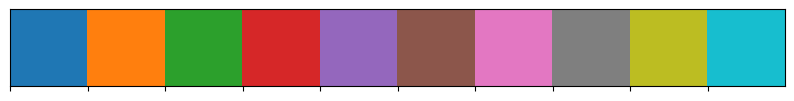

In [27]:
pal = sns.color_palette('tab10', 10)
sns.palplot(pal)

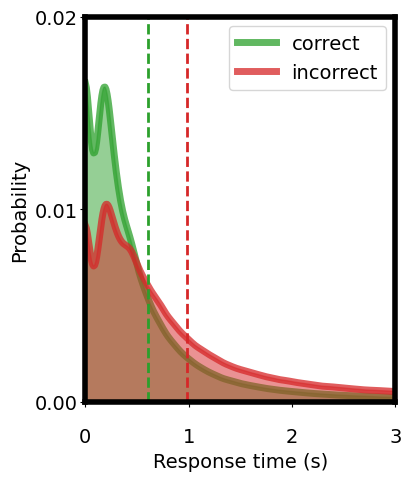

In [28]:
fig, ax = plt.subplots(figsize=(4,5))
x = bins[:-1]
floor = np.zeros(len(correct_gauss_100))
ax.fill_between(x, floor, correct_gauss_100, color=pal[2], alpha = 0.5, zorder=1)
ax.plot(x, correct_gauss_100, color = pal[2], lw=5, alpha = 0.75, label='correct', zorder=1)

ax.fill_between(x, floor, incorrect_gauss_100, color=pal[3], alpha = 0.5, zorder=2)
ax.plot(x, incorrect_gauss_100, color = pal[3], lw=5, alpha = 0.75, label='incorrect', zorder=2)
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_ylim([1e-2,2])
ax.legend(fontsize=14)
ax.set_xlim([0,3])
ax.set_ylim([0, 0.0175])
ax.set_yticks([0, 0.01, 0.02])
ax.yaxis.labelpad = 4
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(4)
    ax.spines[axis].set_color("k")
ax.tick_params(axis="both", labelsize=14, pad=15)
ax.set_ylabel("Probability", fontsize=14)
ax.set_xlabel("Response time (s)", fontsize=14)


for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(2.)
    
ax.axvline(np.mean(rt_correct), color = pal[2], lw=2, ls='dashed')
ax.axvline(np.mean(rt_incorrect), color = pal[3], lw=2, ls='dashed')
    
if SAVE_FIGS:
    ensure_dir(FIGURE_DIR / 'behavioral_results')
    save_fig(FIGURE_DIR / 'behavioral_results' / 'response-time-correct', save_pdf=True)
    plt.show()

### Subset only correct trials

In [29]:
behav_data_all = behav_data_all[behav_data_all.correct == True]
behav_data_all = behav_data_all[behav_data_all.rt < 2]

### Side bias in timing changes over time

100%|██████████| 20/20 [00:11<00:00,  1.73it/s]


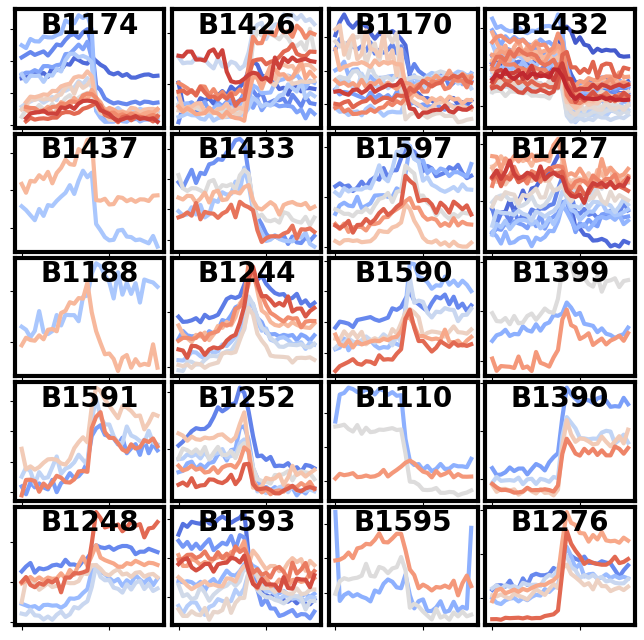

In [30]:
bin_size = 25000

ncols = 4
nrows = 5
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(8, 8), gridspec_kw = {'wspace':0.05, 'hspace':0.05})
for axi, subject in enumerate(tqdm(behav_data_all.subject.unique())):
    ax = axs.flatten()[axi]
    
    behav_data_bird = behav_data_all[behav_data_all.subject == subject]
    
    bin_begin = np.arange(0,len(behav_data_bird), bin_size).astype('int')[:-1]
    bin_end = np.arange(0,len(behav_data_bird), bin_size).astype('int')[1:]
    pal = sns.color_palette('coolwarm', len(bin_begin))
    for bb, be, color in zip(bin_begin, bin_end, pal):
        sns.lineplot(
            x="pos_bin",
            y="rt",
            data=behav_data_bird[bb:be],
            ax=ax,
            #ci=None,
            errorbar=None,
            color=color,
            lw=3,
        )
    # ci=None,
    #ax.set_ylim([-0.2, 0.45])
    ax.set_xticklabels([])
    #if axi % ncols != 0:
    ax.set_yticklabels([])
    ax.set_ylabel("")
    # if axi < ncols*(nrows-1):
    ax.set_xlabel("")
    ax.text(
        0.5,
        0.8,
        subject,
        horizontalalignment="center",
        fontweight="bold",
        fontsize=20,
        transform=ax.transAxes,
    )

    for axis in ["top", "bottom", "left", "right"]:
        ax.spines[axis].set_linewidth(3)
        ax.spines[axis].set_color("k")

### Control for side bias, allowing for change over time

In [31]:
def smooth_array(arr, block_size = 1000):
    """
    Smooths a 1D array using a block filter of length 1000.

    Args:
        arr (numpy.ndarray): A 1D array to be smoothed.

    Returns:
        numpy.ndarray: A smoothed version of the input array.
    """
    # Pad the input array with zeros to handle edges
    pad_size = int(block_size/2)
    arr_padded = np.pad(arr, pad_size, mode='median')[:-1]

    # Create a block filter of length 1000
    block_filter = np.ones(block_size) / block_size

    # Convolve the padded array with the block filter
    smoothed_arr = np.convolve(arr_padded, block_filter, mode='valid')

    return smoothed_arr

In [32]:
n_trials_to_smooth_over = 500

  0%|          | 0/20 [00:00<?, ?it/s]

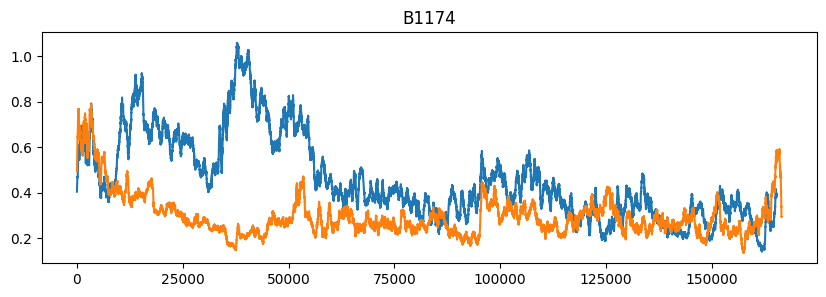

  5%|▌         | 1/20 [00:00<00:08,  2.17it/s]

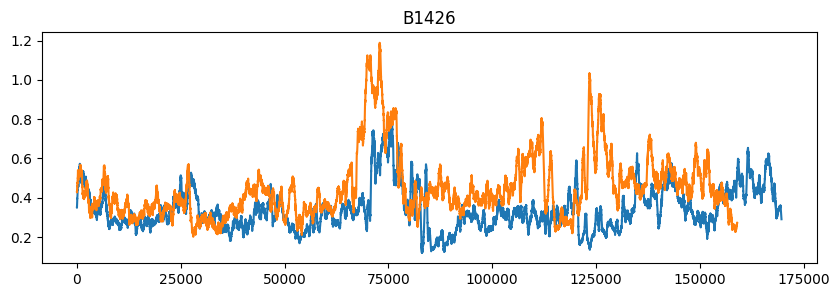

 10%|█         | 2/20 [00:00<00:08,  2.17it/s]

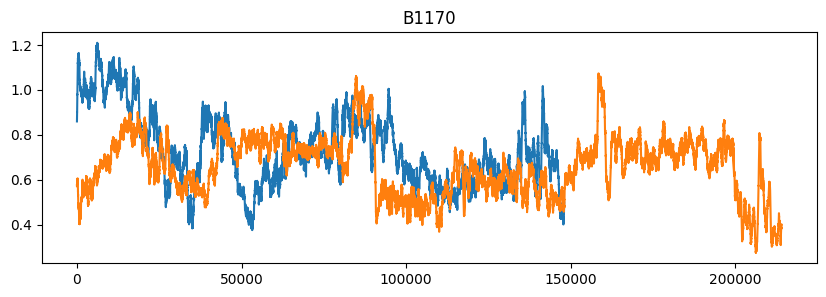

 15%|█▌        | 3/20 [00:01<00:07,  2.20it/s]

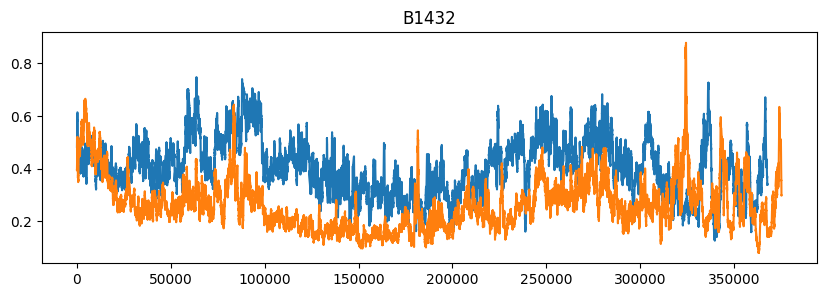

 20%|██        | 4/20 [00:01<00:07,  2.01it/s]

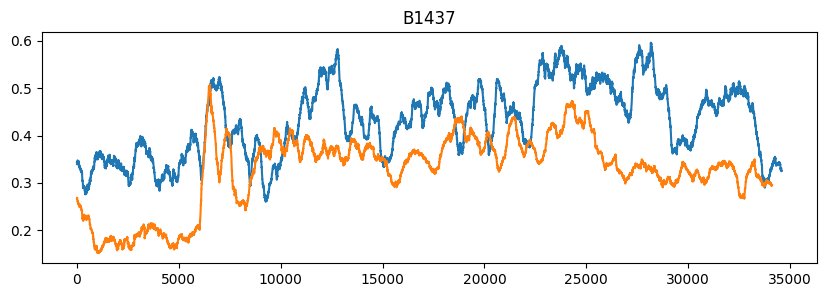

 25%|██▌       | 5/20 [00:02<00:06,  2.19it/s]

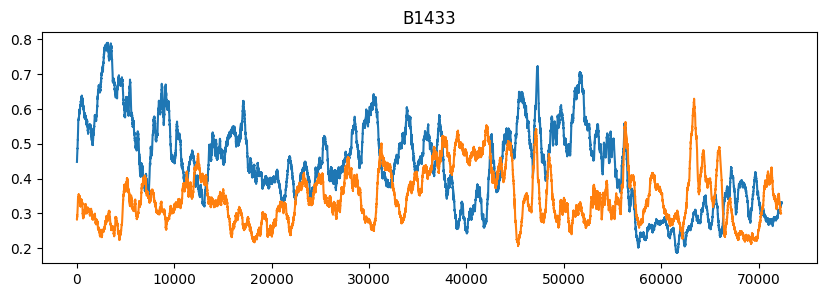

 30%|███       | 6/20 [00:02<00:06,  2.26it/s]

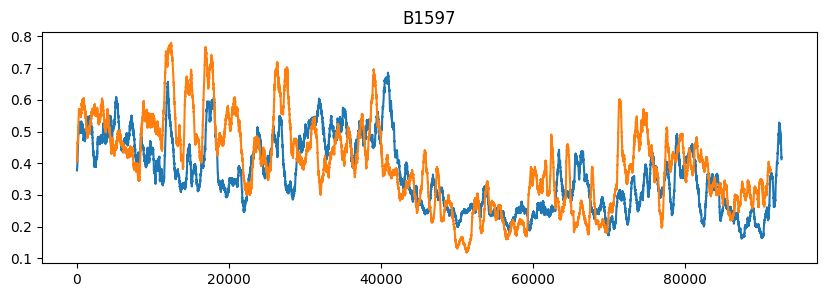

 35%|███▌      | 7/20 [00:03<00:05,  2.31it/s]

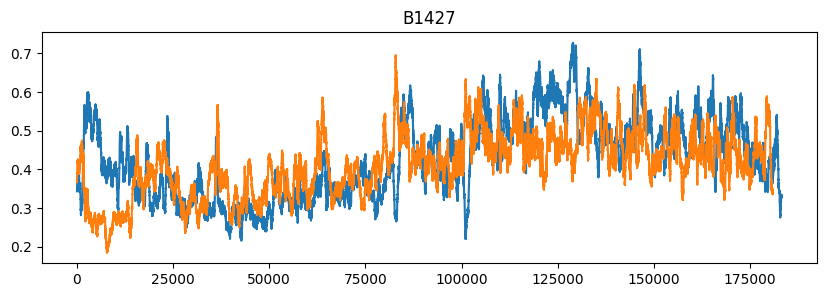

 40%|████      | 8/20 [00:03<00:05,  2.25it/s]

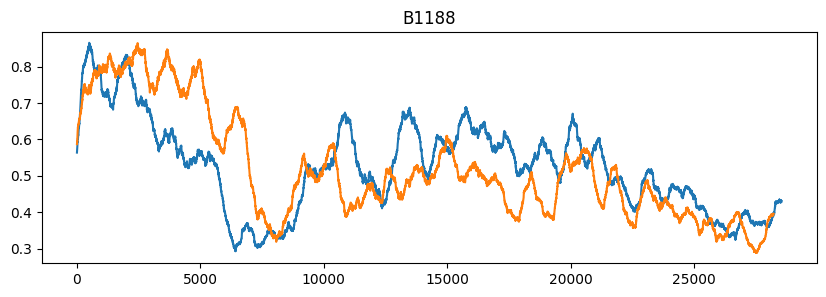

 45%|████▌     | 9/20 [00:03<00:04,  2.37it/s]

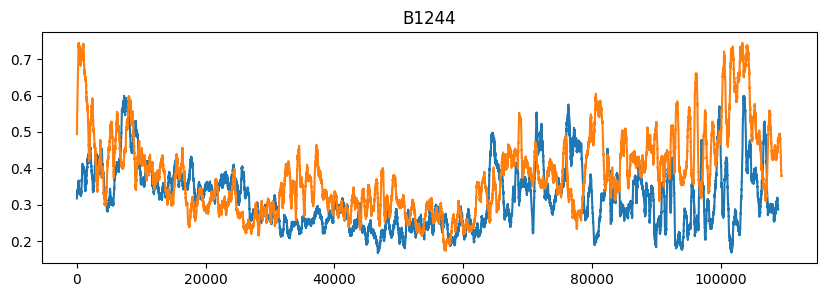

 50%|█████     | 10/20 [00:04<00:04,  2.37it/s]

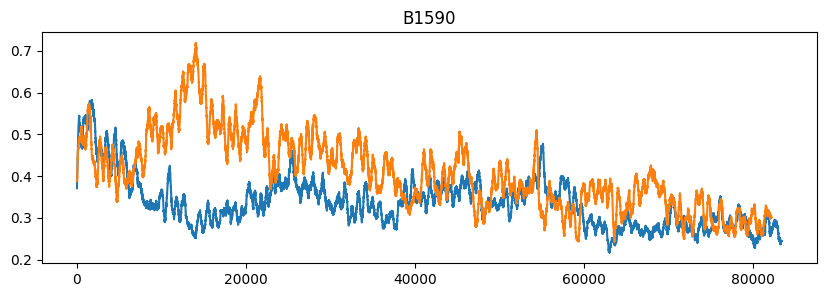

 55%|█████▌    | 11/20 [00:04<00:03,  2.27it/s]

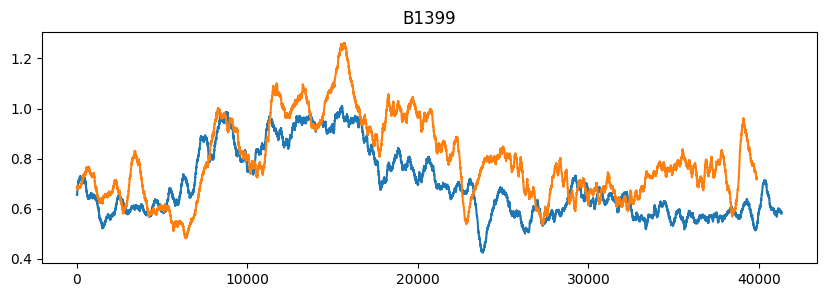

 60%|██████    | 12/20 [00:05<00:03,  2.39it/s]

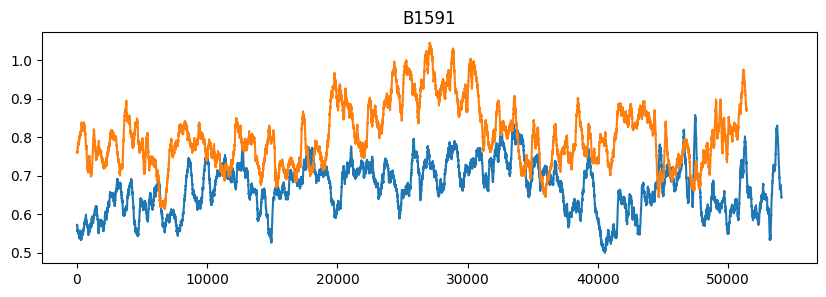

 65%|██████▌   | 13/20 [00:05<00:02,  2.44it/s]

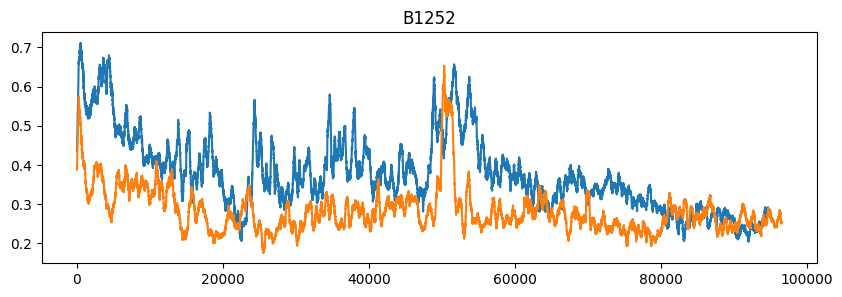

 70%|███████   | 14/20 [00:06<00:02,  2.42it/s]

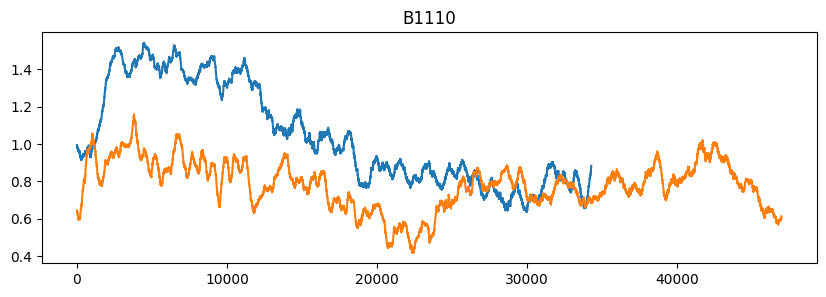

 75%|███████▌  | 15/20 [00:06<00:02,  2.50it/s]

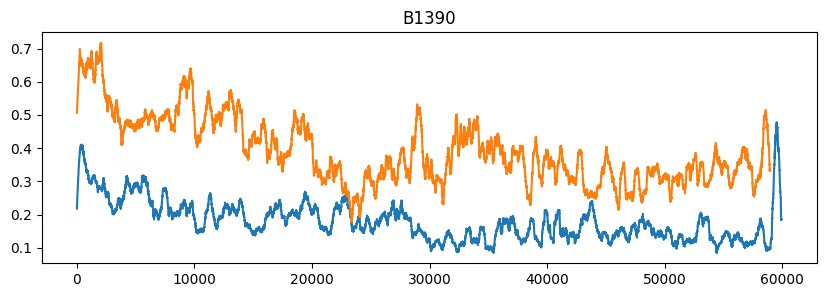

 80%|████████  | 16/20 [00:06<00:01,  2.50it/s]

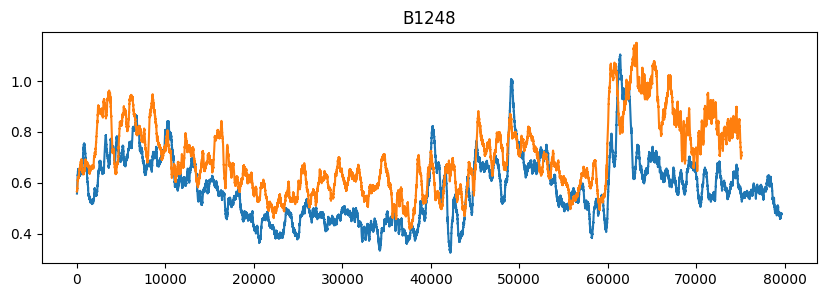

 85%|████████▌ | 17/20 [00:07<00:01,  2.50it/s]

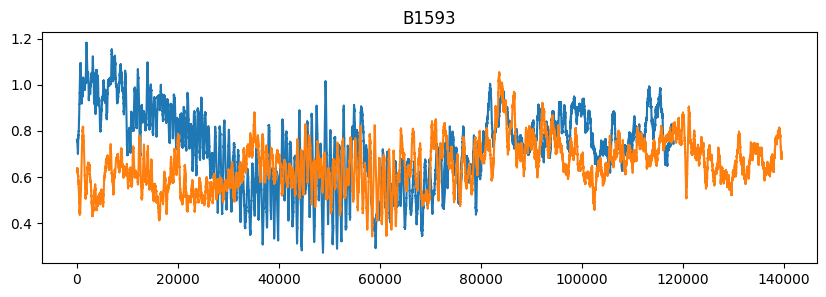

 90%|█████████ | 18/20 [00:07<00:00,  2.44it/s]

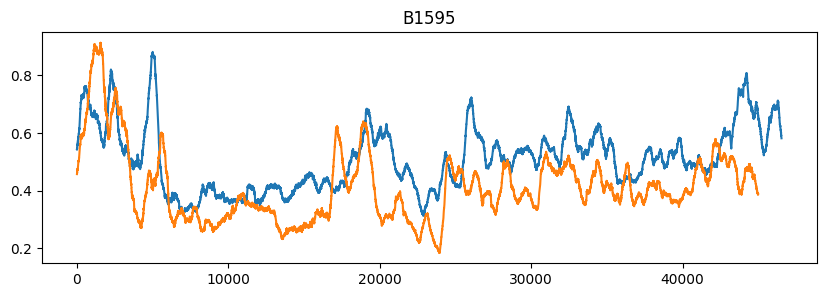

 95%|█████████▌| 19/20 [00:08<00:00,  2.52it/s]

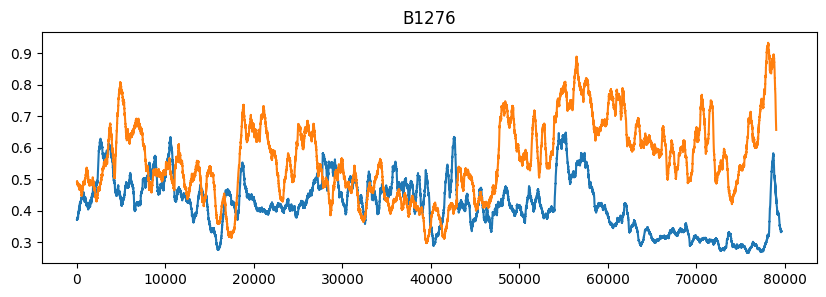

100%|██████████| 20/20 [00:08<00:00,  2.36it/s]


In [33]:
behav_data_all["normed_rt_time"] = np.nan
for subject in tqdm(behav_data_all.subject.unique()):
    subject_trials = behav_data_all.subject.values == subject
    left_trials = behav_data_all.class_.values == "L"
    right_trials = behav_data_all.class_.values == "R"

    smoothed_left = smooth_array(
        behav_data_all.loc[
            subject_trials & left_trials,
            "rt",
        ].values,
        n_trials_to_smooth_over,
    )

    smoothed_right = smooth_array(
        behav_data_all.loc[
            subject_trials & right_trials,
            "rt",
        ].values,
        n_trials_to_smooth_over,
    )
    
    fig, ax = plt.subplots(figsize=(10,3))
    ax.set_title(subject)
    ax.plot(smoothed_left)
    ax.plot(smoothed_right)
    plt.show()

    behav_data_all.loc[
        subject_trials & left_trials,
        "normed_rt_time",
    ] = z_score(behav_data_all.loc[
            subject_trials & left_trials,
            "rt",
        ].values - smoothed_left)
   

    behav_data_all.loc[
        subject_trials & right_trials,
        "normed_rt_time",
    ] = z_score(behav_data_all.loc[
            subject_trials & right_trials,
            "rt",
        ].values - smoothed_right)
    

### Control for side bias, fixed over time

In [34]:
behav_data_all["normed_rt_class"] = np.nan
for subject in tqdm(behav_data_all.subject.unique()):
  
    # based on actual side
    behav_data_all.loc[
        (behav_data_all.subject.values == subject) & (behav_data_all.class_.values == "L"),
        "normed_rt_class",
    ] = z_score(
        behav_data_all.loc[
            (behav_data_all.subject.values == subject) & (behav_data_all.class_.values == "L"),
            "rt",
        ]
    )
    
    behav_data_all.loc[
        (behav_data_all.subject.values == subject) & (behav_data_all.class_.values == "R"),
        "normed_rt_class",
    ] = z_score(
        behav_data_all.loc[
            (behav_data_all.subject.values == subject) & (behav_data_all.class_.values == "R"),
            "rt",
        ]
    )

100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


### Control for cue strength * side interaction for time smoothed

  0%|          | 0/20 [00:00<?, ?it/s]

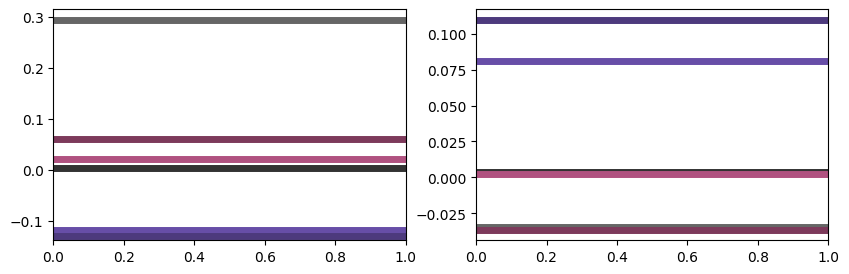

  5%|▌         | 1/20 [00:01<00:33,  1.75s/it]

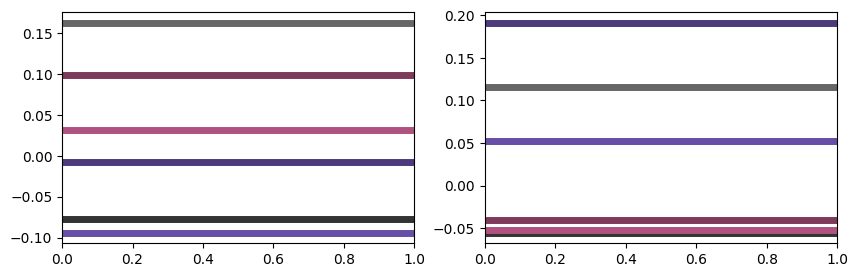

 10%|█         | 2/20 [00:03<00:30,  1.71s/it]

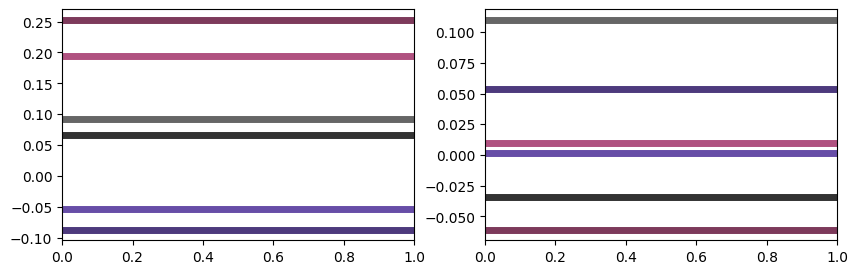

 15%|█▌        | 3/20 [00:05<00:28,  1.71s/it]

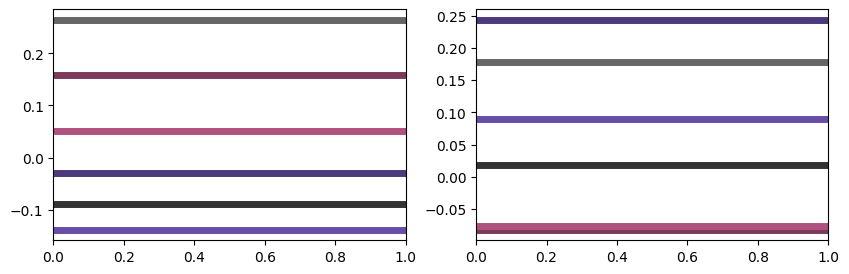

 20%|██        | 4/20 [00:06<00:27,  1.71s/it]

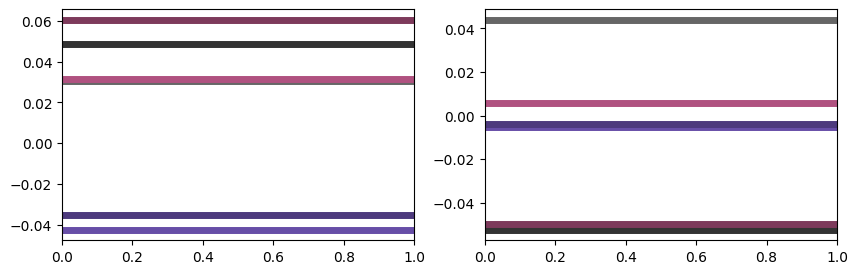

 25%|██▌       | 5/20 [00:08<00:25,  1.69s/it]

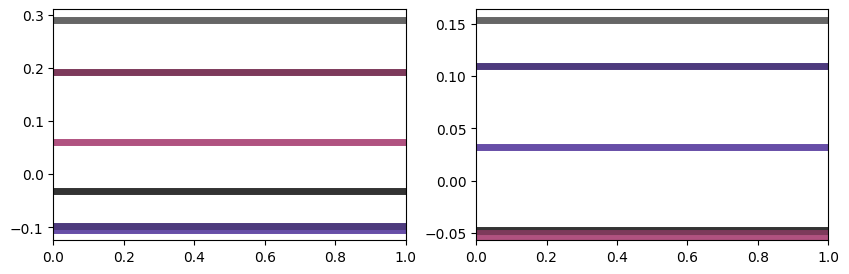

 30%|███       | 6/20 [00:10<00:23,  1.68s/it]

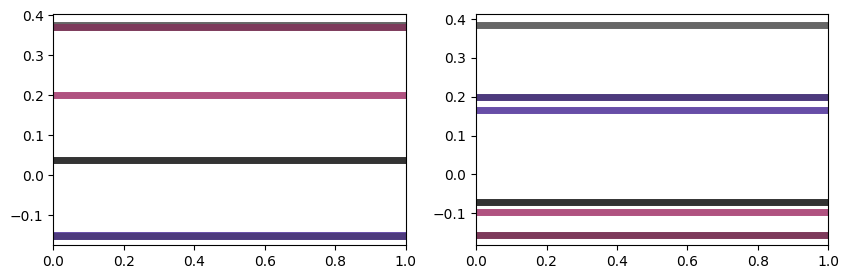

 35%|███▌      | 7/20 [00:11<00:22,  1.71s/it]

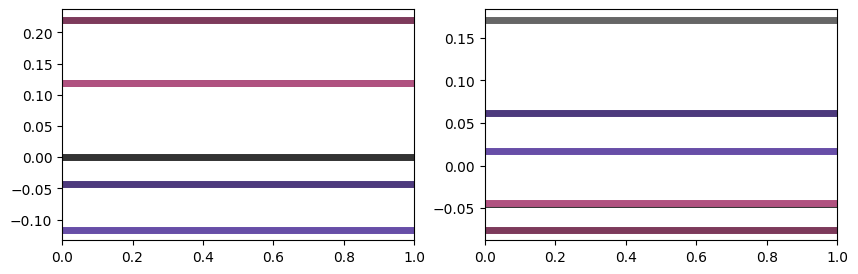

 40%|████      | 8/20 [00:13<00:20,  1.71s/it]

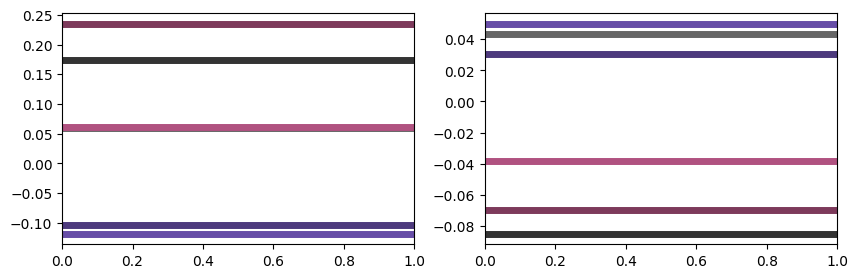

 45%|████▌     | 9/20 [00:15<00:18,  1.70s/it]

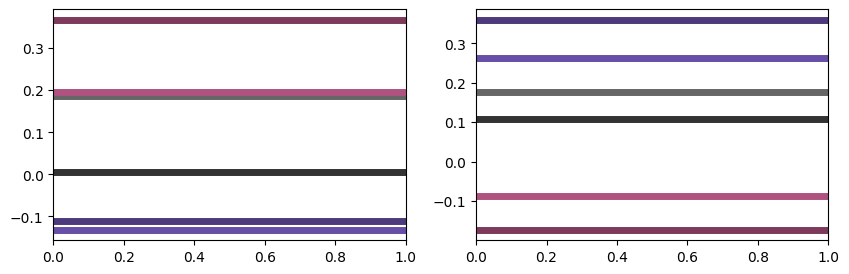

 50%|█████     | 10/20 [00:17<00:16,  1.69s/it]

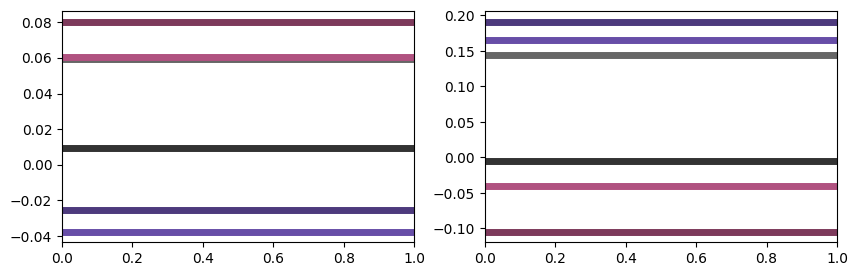

 55%|█████▌    | 11/20 [00:18<00:15,  1.69s/it]

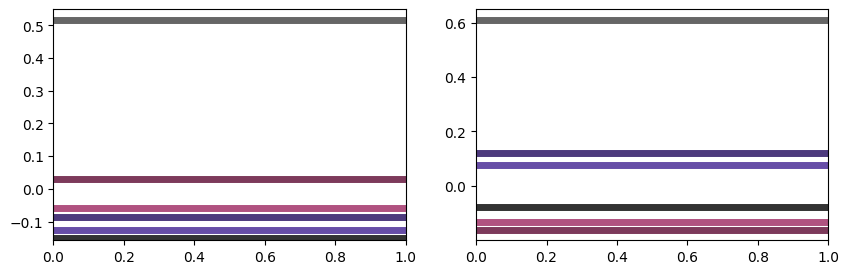

 60%|██████    | 12/20 [00:20<00:13,  1.68s/it]

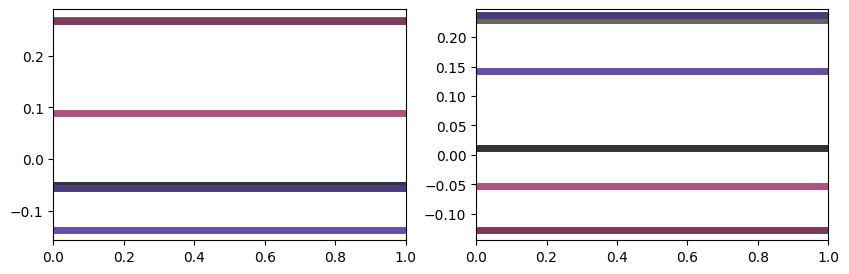

 65%|██████▌   | 13/20 [00:21<00:11,  1.67s/it]

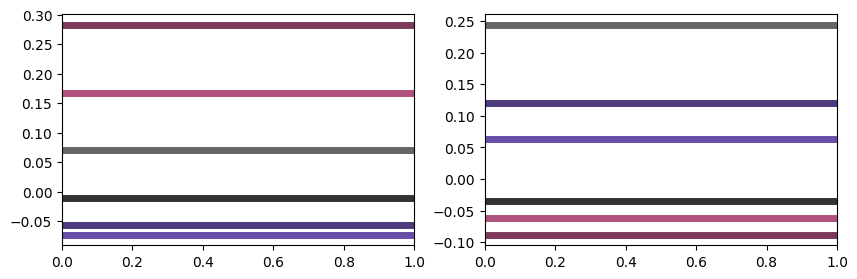

 70%|███████   | 14/20 [00:23<00:10,  1.68s/it]

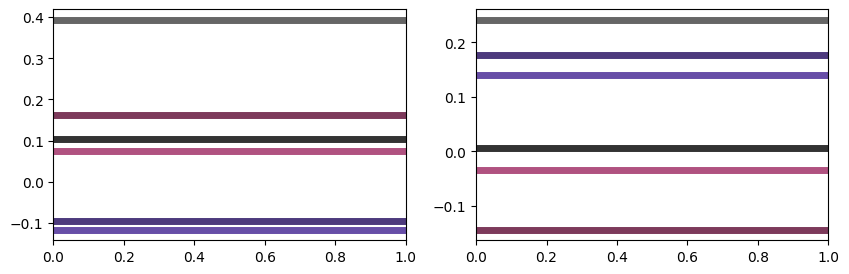

 75%|███████▌  | 15/20 [00:25<00:08,  1.67s/it]

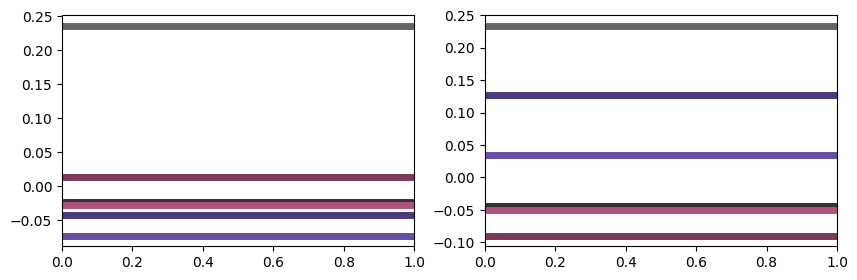

 80%|████████  | 16/20 [00:26<00:06,  1.67s/it]

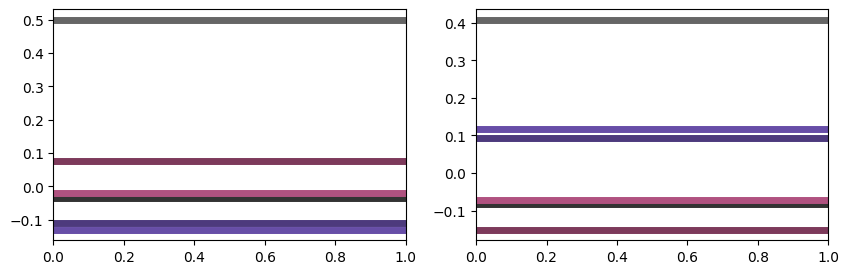

 85%|████████▌ | 17/20 [00:28<00:05,  1.70s/it]

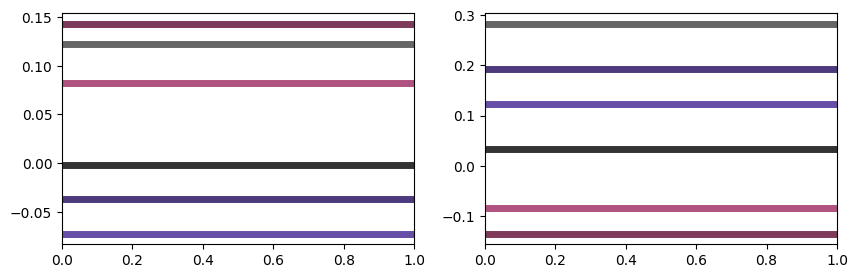

 90%|█████████ | 18/20 [00:30<00:03,  1.69s/it]

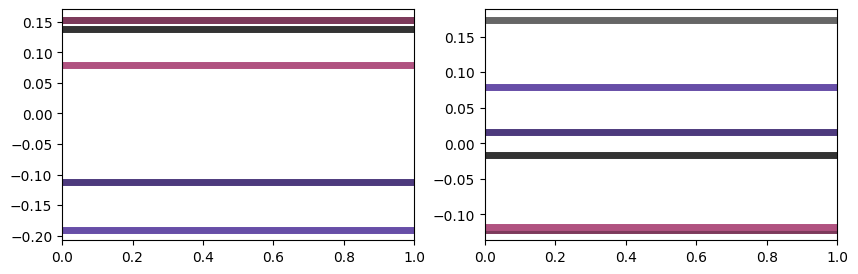

 95%|█████████▌| 19/20 [00:32<00:01,  1.69s/it]

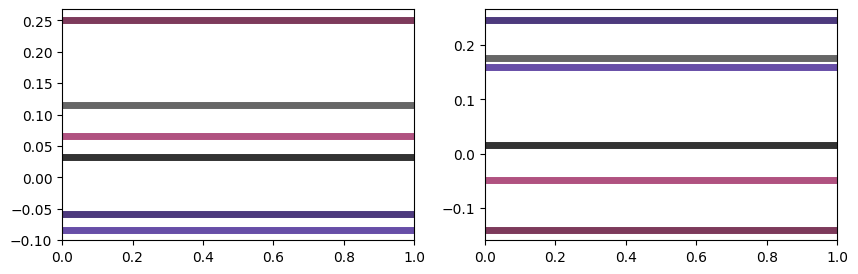

100%|██████████| 20/20 [00:33<00:00,  1.69s/it]


In [35]:
behav_data_all["normed_rt_side_cue"] = np.nan
for subject in tqdm(behav_data_all.subject.unique()):
    subject_trials = behav_data_all.subject.values == subject

    fig, axs = plt.subplots(ncols = 2, figsize=(10,3))

    for side in ["L", "R"]:
        side_trials = behav_data_all.class_.values == side
        
        ax = axs[0] if side == "L" else axs[1]
        
        # set border color cdcp_colors["reinforce"][side]["dark"]

        for cue in behav_data_all.cue_id.unique():
            cue_trials = behav_data_all.cue_id.values == cue

            cue_bias = np.mean(
                behav_data_all.loc[
                        subject_trials & cue_trials & side_trials,
                        "normed_rt_time",
                    ].values
            )

            ax.axhline(cue_bias, color=cdcp_colors["cue_pal"][cue], lw =5)

            behav_data_all.loc[
                subject_trials & side_trials & cue_trials,
                "normed_rt_side_cue",
            ] =  behav_data_all.loc[
                subject_trials & side_trials & cue_trials,
                        "normed_rt_time",
                    ].values - cue_bias

    plt.show()
    #break

### Control for cue strength * side interaction for class smoothed

  0%|          | 0/20 [00:00<?, ?it/s]

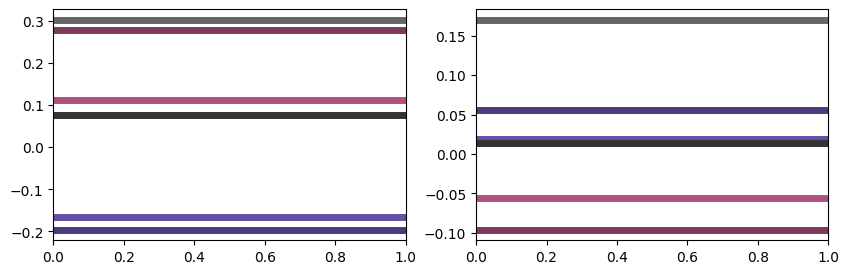

  5%|▌         | 1/20 [00:01<00:34,  1.84s/it]

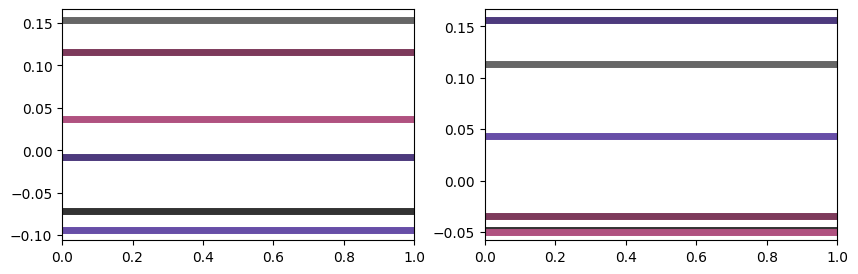

 10%|█         | 2/20 [00:03<00:31,  1.75s/it]

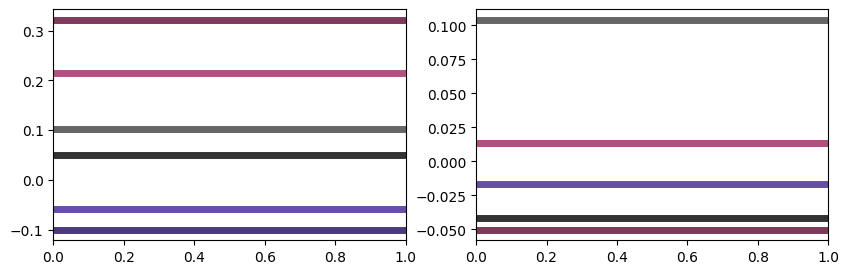

 15%|█▌        | 3/20 [00:05<00:29,  1.72s/it]

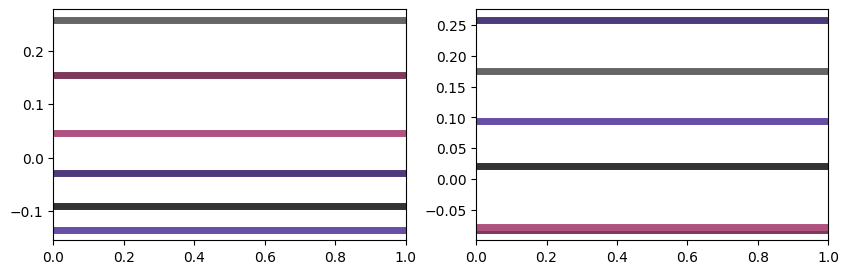

 20%|██        | 4/20 [00:06<00:27,  1.72s/it]

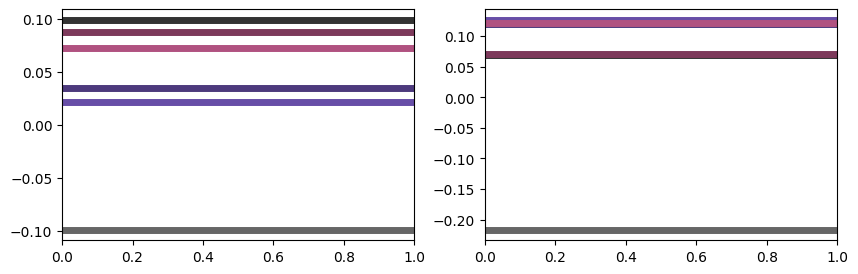

 25%|██▌       | 5/20 [00:08<00:25,  1.70s/it]

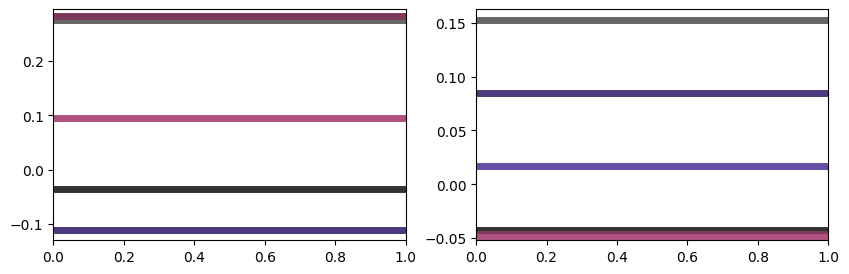

 30%|███       | 6/20 [00:10<00:23,  1.69s/it]

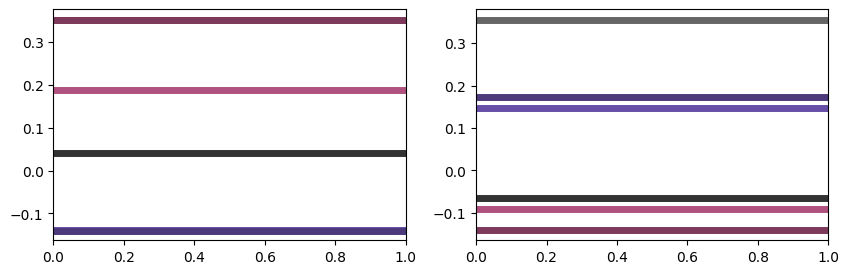

 35%|███▌      | 7/20 [00:11<00:21,  1.69s/it]

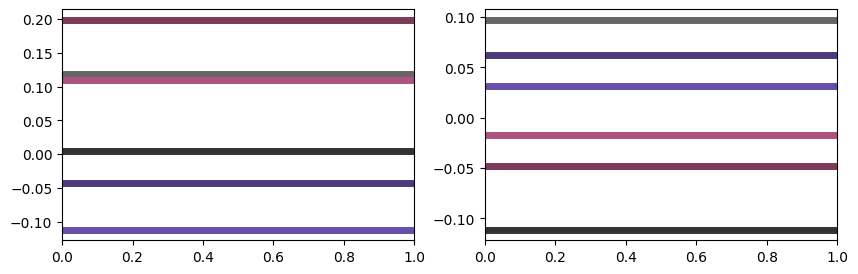

 40%|████      | 8/20 [00:13<00:20,  1.73s/it]

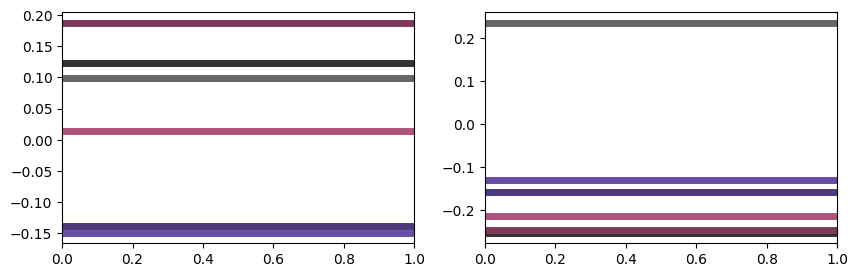

 45%|████▌     | 9/20 [00:15<00:18,  1.71s/it]

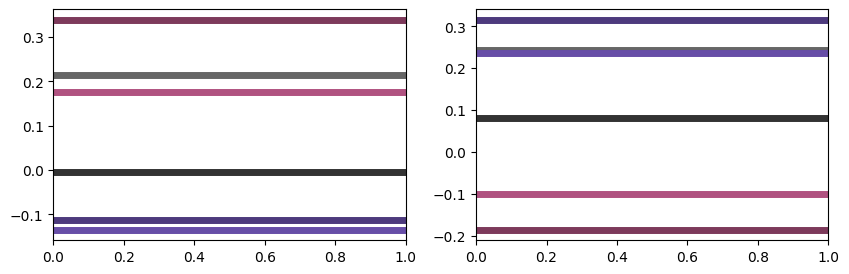

 50%|█████     | 10/20 [00:17<00:17,  1.71s/it]

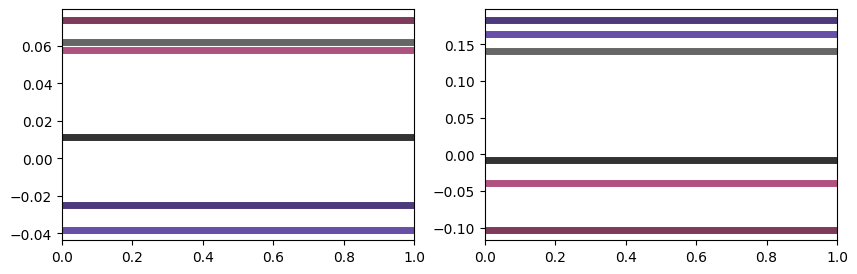

 55%|█████▌    | 11/20 [00:18<00:15,  1.70s/it]

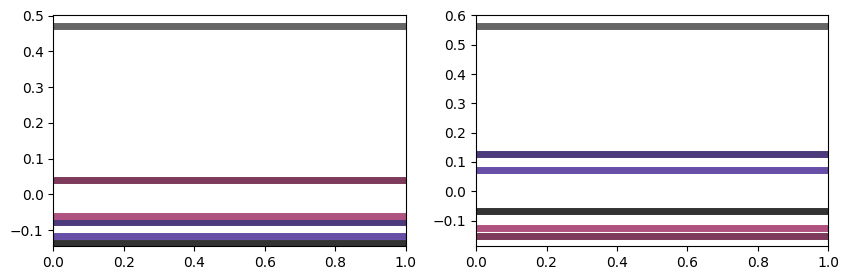

 60%|██████    | 12/20 [00:20<00:13,  1.70s/it]

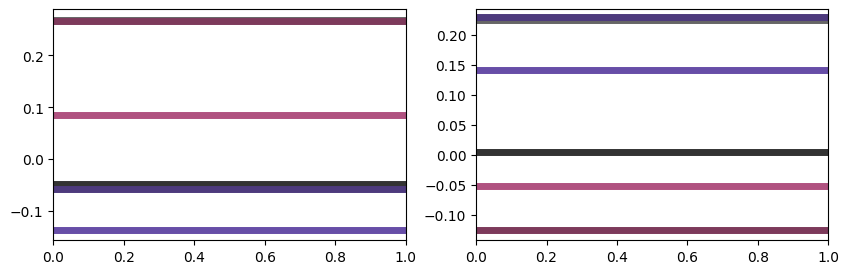

 65%|██████▌   | 13/20 [00:22<00:11,  1.69s/it]

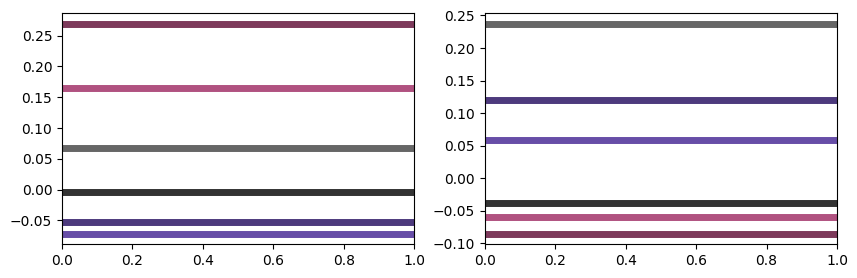

 70%|███████   | 14/20 [00:23<00:10,  1.70s/it]

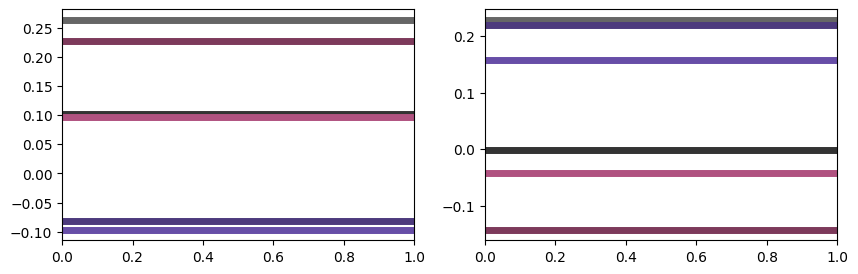

 75%|███████▌  | 15/20 [00:25<00:08,  1.69s/it]

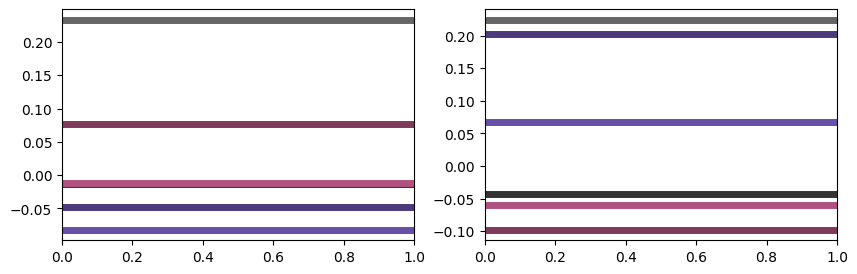

 80%|████████  | 16/20 [00:27<00:06,  1.69s/it]

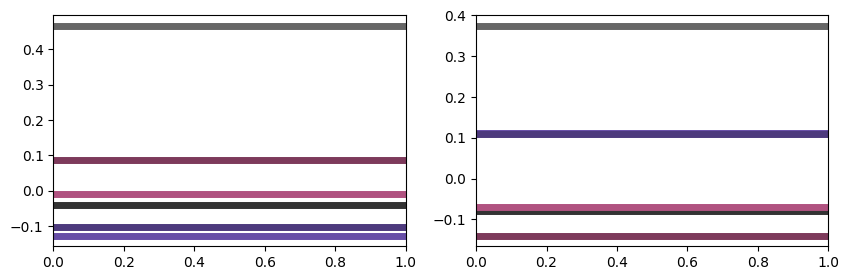

 85%|████████▌ | 17/20 [00:28<00:05,  1.69s/it]

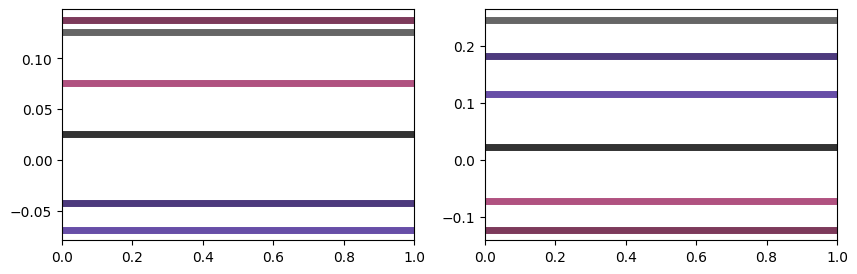

 90%|█████████ | 18/20 [00:30<00:03,  1.71s/it]

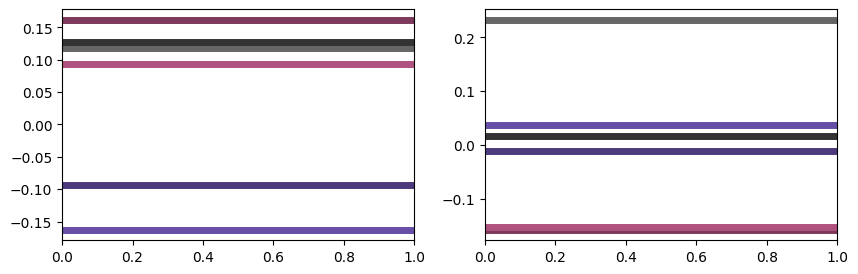

 95%|█████████▌| 19/20 [00:32<00:01,  1.69s/it]

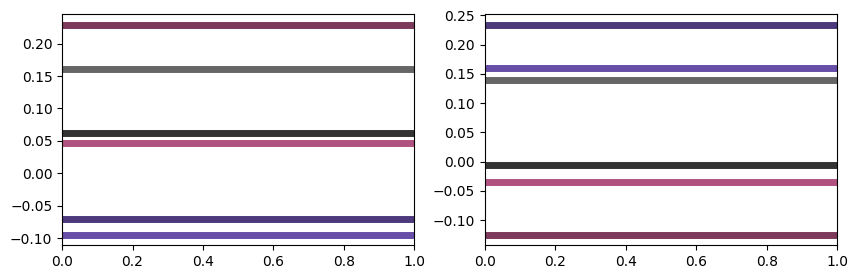

100%|██████████| 20/20 [00:34<00:00,  1.70s/it]


In [36]:
behav_data_all["normed_rt_side_and_cue"] = np.nan
for subject in tqdm(behav_data_all.subject.unique()):
    subject_trials = behav_data_all.subject.values == subject

    fig, axs = plt.subplots(ncols = 2, figsize=(10,3))

    for side in ["L", "R"]:
        side_trials = behav_data_all.class_.values == side
        
        ax = axs[0] if side == "L" else axs[1]
        
        # set border color cdcp_colors["reinforce"][side]["dark"]

        for cue in behav_data_all.cue_id.unique():
            cue_trials = behav_data_all.cue_id.values == cue

            cue_bias = np.mean(
                behav_data_all.loc[
                        subject_trials & cue_trials & side_trials,
                        "normed_rt_class",
                    ].values
            )

            ax.axhline(cue_bias, color=cdcp_colors["cue_pal"][cue], lw =5)

            behav_data_all.loc[
                subject_trials & side_trials & cue_trials,
                "normed_rt_side_and_cue",
            ] =  behav_data_all.loc[
                subject_trials & side_trials & cue_trials,
                        "normed_rt_class",
                    ].values - cue_bias

    plt.show()
    #break

100%|██████████| 20/20 [00:12<00:00,  1.58it/s]


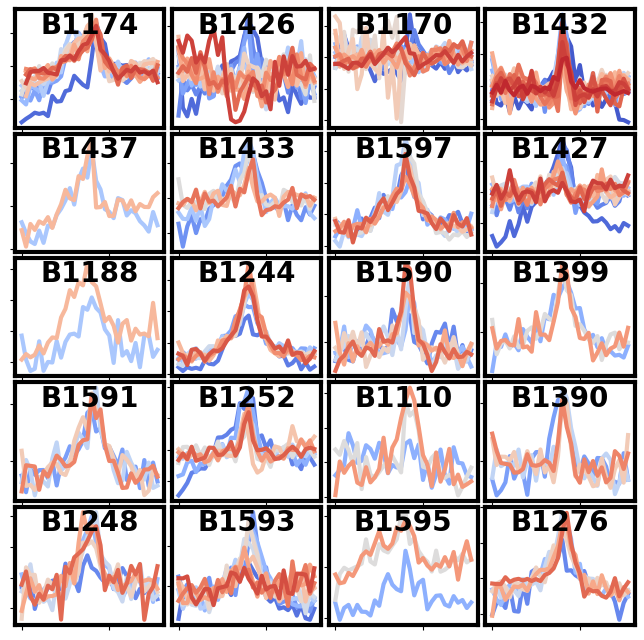

In [37]:
bin_size = 25000

ncols = 4
nrows = 5
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(8, 8), gridspec_kw = {'wspace':0.05, 'hspace':0.05})
for axi, subject in enumerate(tqdm(behav_data_all.subject.unique())):
    ax = axs.flatten()[axi]
    
    behav_data_bird = behav_data_all[behav_data_all.subject == subject]
    
    bin_begin = np.arange(0,len(behav_data_bird), bin_size).astype('int')[:-1]
    bin_end = np.arange(0,len(behav_data_bird), bin_size).astype('int')[1:]
    pal = sns.color_palette('coolwarm', len(bin_begin))
    for bb, be, color in zip(bin_begin, bin_end, pal):
        sns.lineplot(
            x="pos_bin",
            y="normed_rt_side_cue",
            data=behav_data_bird[bb:be],
            ax=ax,
            #ci=None,
            errorbar=None,
            color=color,
            lw=3,
        )
    # ci=None,
    #ax.set_ylim([-0.2, 0.45])
    ax.set_xticklabels([])
    #if axi % ncols != 0:
    ax.set_yticklabels([])
    ax.set_ylabel("")
    # if axi < ncols*(nrows-1):
    ax.set_xlabel("")
    ax.text(
        0.5,
        0.8,
        subject,
        horizontalalignment="center",
        fontweight="bold",
        fontsize=20,
        transform=ax.transAxes,
    )

    for axis in ["top", "bottom", "left", "right"]:
        ax.spines[axis].set_linewidth(3)
        ax.spines[axis].set_color("k")


### Plot 

In [38]:
len(behav_data_all)

4209025

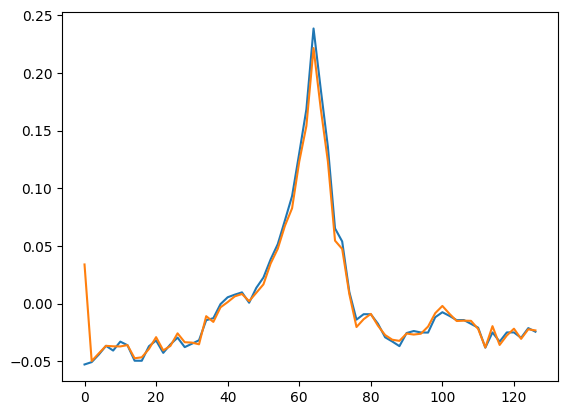

In [39]:
fig, ax = plt.subplots()
x = np.arange(0,127,2)
y = [np.mean(behav_data_all[behav_data_all.interpolation_point.values == i].normed_rt_side_cue.values) for i in x]
plt.plot(x,y)
y = [np.mean(behav_data_all[behav_data_all.interpolation_point.values == i].normed_rt_class.values) for i in x]
plt.plot(x,y)

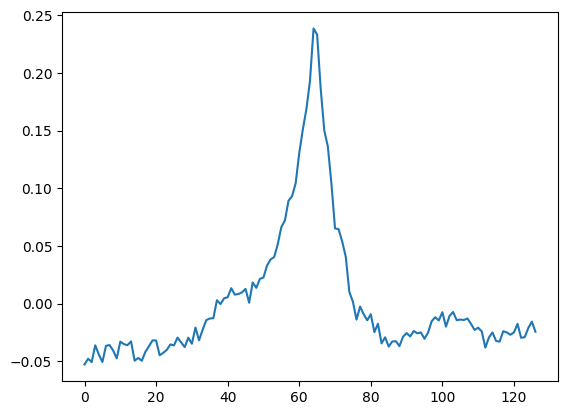

In [40]:
fig, ax = plt.subplots()
x = np.arange(127)
y = [np.mean(behav_data_all[behav_data_all.interpolation_point.values == i].normed_rt_side_cue.values) for i in x]
plt.plot(x,y)

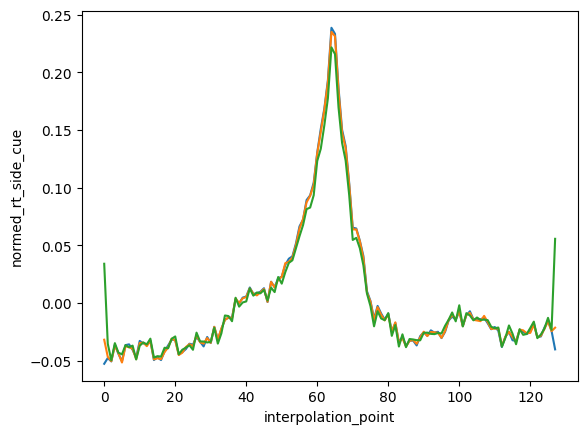

In [41]:
# plot difference between norming by class vs decision
fig, ax = plt.subplots()
sns.lineplot(x='interpolation_point', y='normed_rt_side_cue', data = behav_data_all, errorbar = None, ax = ax)
sns.lineplot(x='interpolation_point', y='normed_rt_time', data = behav_data_all, ax = ax, errorbar = None)
sns.lineplot(x='interpolation_point', y='normed_rt_class', data = behav_data_all, ax = ax, errorbar = None)
plt.show()

In [42]:
len(behav_data_all)

4209025

/tmp/ipykernel_20884/1857384862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_data_bird['time_float'] = behav_data_bird.index.values.astype('float')


PearsonRResult(statistic=0.019101423144654787, pvalue=7.514604498030628e-09)
PearsonRResult(statistic=-0.0009443809574438146, pvalue=0.7751157622158482)


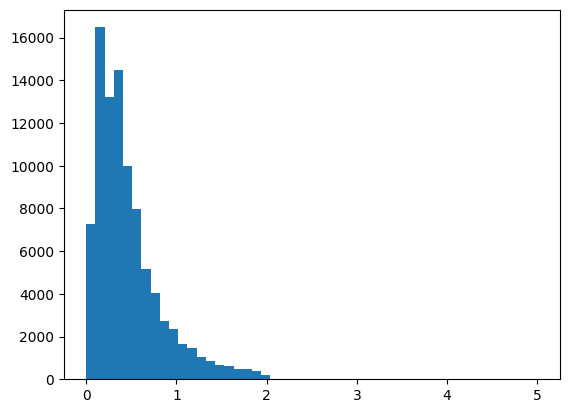

In [43]:
# look at relationship between reaction time and time (birds get faster with time)
subject = 'B1595'
behav_data_bird = behav_data_all[behav_data_all.subject == subject]
behav_data_bird['time_float'] = behav_data_bird.index.values.astype('float')
print(scipy.stats.pearsonr(behav_data_bird.time_float, behav_data_bird.rt.values))
print(scipy.stats.pearsonr(behav_data_bird.time_float, behav_data_bird.normed_rt_time.values))
plt.hist(behav_data_bird.rt.values, bins = np.linspace(0,5,50));

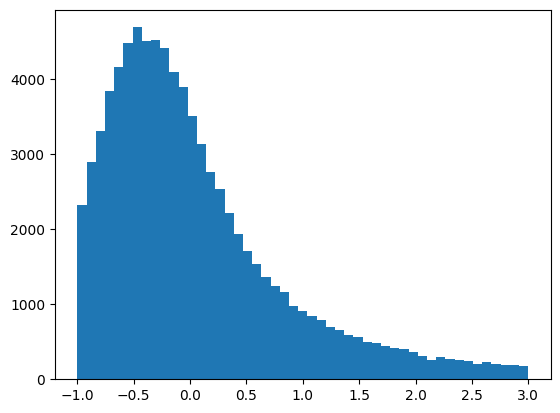

In [44]:
plt.hist(behav_data_bird.normed_rt_side_cue.values, bins = np.linspace(-1,3,50));

In [45]:
#bins = np.linspace(0,127, 32)
#behav_data_all['interpolation_bin'] = np.digitize(behav_data_all.interpolation_point, bins)
behav_data_all['interpolation_bin'] = behav_data_all['pos_bin']

In [46]:
rt_column = "normed_rt_side_cue"
#rt_col = "rt"

In [47]:
# sort birds by rt differences
rt_by_interp_list = []
for axi, subject in enumerate(tqdm(behav_data_all.subject.unique())):
    behav_data_bird = behav_data_all[behav_data_all.subject == subject]
    m = (behav_data_bird.interpolation_point > 32) & (behav_data_bird.interpolation_point < 63.5+32)
    behav_data_bird = behav_data_bird[m]
    x = np.abs(behav_data_bird.interpolation_bin.values - 16)
    y = behav_data_bird.normed_rt_class.values
    r2, p = scipy.stats.pearsonr(x,y, alternative='less')
    print(subject, len(behav_data_bird), r2, p)
    rt_by_interp_list.append([subject, r2, p])
rt_by_interp_df = pd.DataFrame(rt_by_interp_list, columns = ['subject','r2', 'p'])

  5%|▌         | 1/20 [00:00<00:12,  1.51it/s]

B1174 163309 -0.07666936296495384 1.1061768642765808e-211


 10%|█         | 2/20 [00:01<00:10,  1.70it/s]

B1426 156779 -0.0016408363919478948 0.257946304116377


 15%|█▌        | 3/20 [00:01<00:10,  1.65it/s]

B1170 173204 -0.0054372660405738755 0.01182185006951443


 20%|██        | 4/20 [00:02<00:10,  1.58it/s]

B1432 364145 -0.047078680266239466 4.961599064514905e-178


 25%|██▌       | 5/20 [00:02<00:08,  1.79it/s]

B1437 33677 -0.04796661104651105 6.413442426026934e-19


 30%|███       | 6/20 [00:03<00:07,  1.97it/s]

B1433 71126 -0.06222228086175056 2.9423544875705522e-62


 35%|███▌      | 7/20 [00:03<00:05,  2.22it/s]

B1597 90007 -0.08670835723544526 4.8860866327433356e-150


 40%|████      | 8/20 [00:04<00:05,  2.31it/s]

B1427 179610 -0.03885228133278671 2.9220649739298803e-61


 45%|████▌     | 9/20 [00:04<00:04,  2.59it/s]

B1188 27562 -0.04847408182439655 4.074531768251189e-16


 50%|█████     | 10/20 [00:04<00:03,  2.70it/s]

B1244 106844 -0.12359498191144892 0.0


 55%|█████▌    | 11/20 [00:05<00:03,  2.81it/s]

B1590 81733 -0.0653921564978856 1.878696179044426e-78


 60%|██████    | 12/20 [00:05<00:02,  2.99it/s]

B1399 39230 -0.07188996423565865 2.0297035556897198e-46


 65%|██████▌   | 13/20 [00:05<00:02,  3.11it/s]

B1591 51300 -0.06600152755249634 6.218784680982762e-51


 70%|███████   | 14/20 [00:05<00:01,  3.08it/s]

B1252 93892 -0.05734646601736385 1.5704881643587113e-69


 75%|███████▌  | 15/20 [00:06<00:01,  3.17it/s]

B1110 36932 -0.04733897036975726 4.423717333048718e-20


 80%|████████  | 16/20 [00:06<00:01,  3.23it/s]

B1390 58338 -0.056667165566670515 5.240893720832427e-43


 85%|████████▌ | 17/20 [00:06<00:00,  3.21it/s]

B1248 75436 -0.05255897127574736 1.3401861438425914e-47


 90%|█████████ | 18/20 [00:07<00:00,  3.01it/s]

B1593 125178 -0.05691767509226731 1.243704699957256e-90


 95%|█████████▌| 19/20 [00:07<00:00,  3.12it/s]

B1595 40319 -0.04127595827027422 5.599918601690135e-17


100%|██████████| 20/20 [00:07<00:00,  2.56it/s]

B1276 77864 -0.08251224562003293 5.411458782701286e-118


In [48]:
rt_by_interp_df.sort_values(by='p')

subject        r2              p
9    B1244 -0.123595   0.000000e+00
0    B1174 -0.076669  1.106177e-211
3    B1432 -0.047079  4.961599e-178
6    B1597 -0.086708  4.886087e-150
19   B1276 -0.082512  5.411459e-118
17   B1593 -0.056918   1.243705e-90
10   B1590 -0.065392   1.878696e-78
13   B1252 -0.057346   1.570488e-69
5    B1433 -0.062222   2.942354e-62
7    B1427 -0.038852   2.922065e-61
12   B1591 -0.066002   6.218785e-51
16   B1248 -0.052559   1.340186e-47
11   B1399 -0.071890   2.029704e-46
15   B1390 -0.056667   5.240894e-43
14   B1110 -0.047339   4.423717e-20
4    B1437 -0.047967   6.413442e-19
18   B1595 -0.041276   5.599919e-17
8    B1188 -0.048474   4.074532e-16
2    B1170 -0.005437   1.182185e-02
1    B1426 -0.001641   2.579463e-01

100%|██████████| 20/20 [00:10<00:00,  2.00it/s]


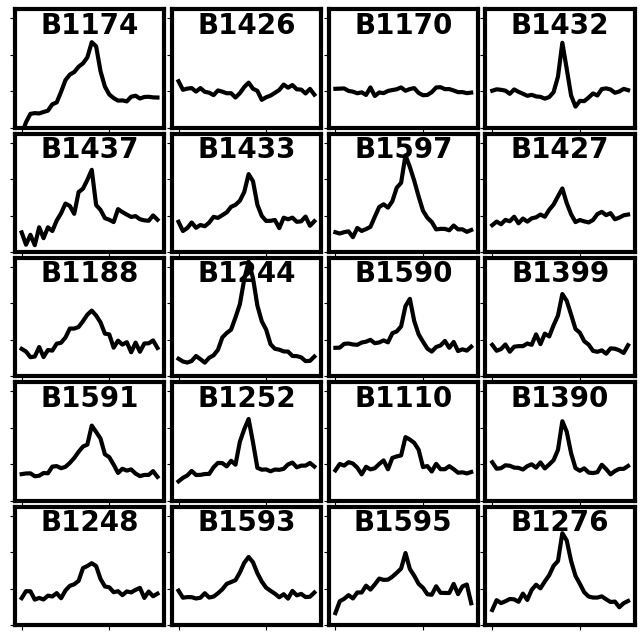

In [49]:
ncols = 4
nrows = 5
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(8, 8), gridspec_kw = {'wspace':0.05, 'hspace':0.05})
for axi, subject in enumerate(tqdm(behav_data_all.subject.unique())):
    ax = axs.flatten()[axi]
    behav_data_bird = behav_data_all[behav_data_all.subject == subject]
    sns.lineplot(
        x="interpolation_bin",
        y=rt_column,
        data=behav_data_bird,
        ax=ax,
        #ci=None,
        errorbar=None,
        color="k",
        lw=3,
    )
    # ci=None,
    ax.set_ylim([-0.2, 0.45])
    ax.set_xticklabels([])
    #if axi % ncols != 0:
    ax.set_yticklabels([])
    ax.set_ylabel("")
    # if axi < ncols*(nrows-1):
    ax.set_xlabel("")
    ax.text(
        0.5,
        0.8,
        subject,
        horizontalalignment="center",
        fontweight="bold",
        fontsize=20,
        transform=ax.transAxes,
    )

    for axis in ["top", "bottom", "left", "right"]:
        ax.spines[axis].set_linewidth(3)
        ax.spines[axis].set_color("k")

if SAVE_FIGS:
    ensure_dir(FIGURE_DIR / 'behavioral_results')
    save_fig(FIGURE_DIR / 'behavioral_results' / 'response-time-by-bird', save_pdf=True)
    plt.show()

100%|██████████| 20/20 [00:57<00:00,  2.88s/it]


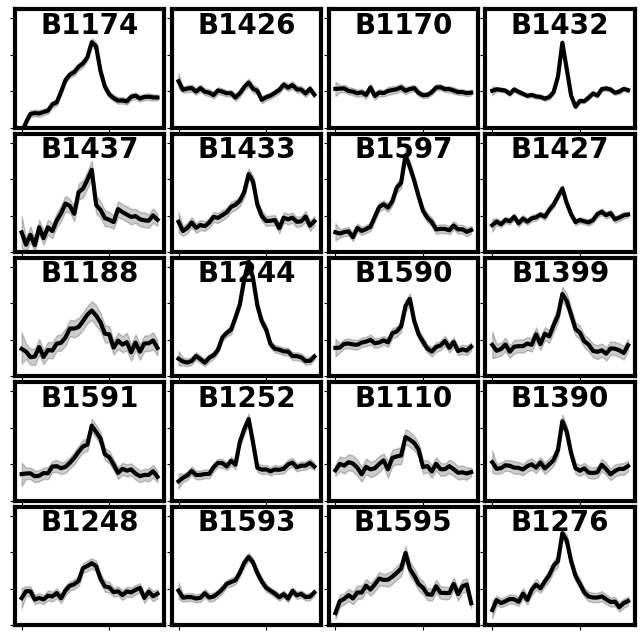

In [98]:
ncols = 4
nrows = 5
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(8, 8), gridspec_kw = {'wspace':0.05, 'hspace':0.05})
for axi, subject in enumerate(tqdm(behav_data_all.subject.unique())):
    ax = axs.flatten()[axi]
    behav_data_bird = behav_data_all[behav_data_all.subject == subject]
    sns.lineplot(
        x="interpolation_bin",
        y=rt_column,
        data=behav_data_bird,
        ax=ax,
        #ci=None,
        #errorbar=None,
        color="k",
        lw=3,
    )
    # ci=None,
    ax.set_ylim([-0.2, 0.45])
    ax.set_xticklabels([])
    #if axi % ncols != 0:
    ax.set_yticklabels([])
    ax.set_ylabel("")
    # if axi < ncols*(nrows-1):
    ax.set_xlabel("")
    ax.text(
        0.5,
        0.8,
        subject,
        horizontalalignment="center",
        fontweight="bold",
        fontsize=20,
        transform=ax.transAxes,
    )

    for axis in ["top", "bottom", "left", "right"]:
        ax.spines[axis].set_linewidth(3)
        ax.spines[axis].set_color("k")

if SAVE_FIGS:
    ensure_dir(FIGURE_DIR / 'behavioral_results')
    save_fig(FIGURE_DIR / 'behavioral_results' / 'response-time-by-bird-ci', save_pdf=True)
    plt.show()

In [50]:
pal = sns.color_palette('coolwarm', 12)

#### Response time vs uncertainty

In [51]:
import lmfit

In [52]:
def residuals(y_true, y_model, x, logscaled=False):
    if logscaled:
        return np.abs(np.log(y_true) - np.log(y_model)) * (1 / (np.log(1 + x)))
    else:
        return np.abs(y_true - y_model)

In [53]:
def model_res(p, x, y, fit, model):
    if fit == "lin":
        return residuals(y, model(p, x), x)
    else:
        return residuals(y, model(p, x), x, logscaled=True)

In [54]:
def exp_decay(p, x):
    return p["e_init"] * np.exp(-x * p["e_decay_const"]) + p["intercept"]

In [55]:
def fit_decay(x, y):
    p_exp = lmfit.Parameters()
    p_exp.add_many(
        ("e_init", 0.05, True, 1e-4, 1),
        ("e_decay_const", 0.1, True, 1e-4, 0.5),
        ("intercept", 0.25, True, -0.5, 2),
    )
    results_exp_min = lmfit.Minimizer(
        model_res, p_exp, fcn_args=(x, y, "lin", exp_decay), nan_policy="omit"
    ).minimize(method="nelder")
    e_init = results_exp_min.params['e_init'].value
    e_decay_const = results_exp_min.params['e_decay_const'].value
    intercept = results_exp_min.params['intercept'].value
    return results_exp_min, e_init, e_decay_const, intercept

In [56]:
behav_data_all['interpolation'] = [i+j for i,j in zip(behav_data_all.left_stim, behav_data_all.right_stim)]

In [57]:
from cdcp.paths import DATA_DIR, ensure_dir

In [58]:
fit_df_interp = pd.read_pickle(DATA_DIR/'behavior'/'fit_df_interp.pickle')

### example fit

In [59]:
pd.set_option('mode.chained_assignment', None)

In [60]:
subject = "B1597"

In [61]:
subject_data = behav_data_all[(behav_data_all.subject == subject)]

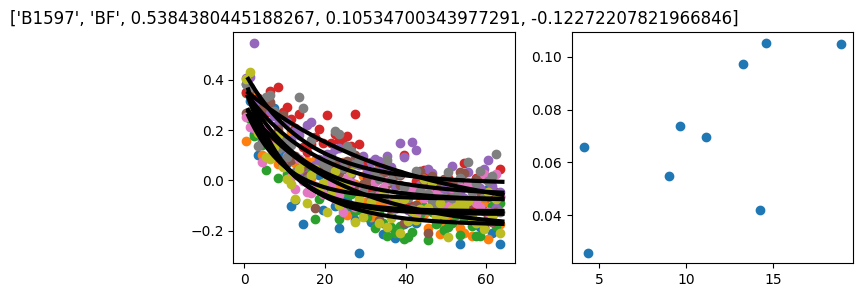

In [62]:
unit =  'interpolation_point'
fit_dfs_bird = []

fig, axs = plt.subplots(ncols=2, figsize=(8,3))

for interpolation in subject_data.interpolation.unique():
    interpolation_data = subject_data[(subject_data.interpolation == interpolation)]
    unique_units = np.unique(interpolation_data[unit].values)

    interpolation_data['distance_from_boundary'] = np.abs(interpolation_data[unit].values - np.median(unique_units))

    x = interpolation_data.distance_from_boundary.values.astype(float)
    y = interpolation_data[rt_column].values.astype(float)

    # fit model
    results_exp_min, e_init, e_decay_const, intercept = fit_decay(x, y)
    r2 = 1 - np.sum((results_exp_min.residual)**2) / np.sum((y - np.mean(y))**2)

    # get model values for x
    x_model = np.linspace(0,int(len(unique_units)/2), 1000)
    fit_y = exp_decay(x=x_model, p=results_exp_min.params)
    fit_range = fit_y[0] - intercept
    
    
    # plot 
    x_model = np.linspace(1,int(len(unique_units)/2), 500)

    fit_y = exp_decay(x=x_model, p=results_exp_min.params)
    binned_rt = (
        interpolation_data[["distance_from_boundary", rt_column]]
        .groupby("distance_from_boundary")
        .describe()[rt_column][["mean", "count", "std"]]
        .reset_index()
    )
    ax = axs[0]
    ax.scatter(binned_rt.distance_from_boundary.values, binned_rt["mean"].values)
    ax.set_title([subject, interpolation, e_init, e_decay_const, intercept])
    ax.plot(x_model, fit_y, color='k', lw=3)
    #ax.set_ylim([0,2])
    
    fit_slope = fit_df_interp[(fit_df_interp.cue == 'NC') & (fit_df_interp.bird == subject) & (fit_df_interp.interp == interpolation)]._slope.values[0]
    fit_df = pd.Series(
        {
            'bird': subject,
            'interpolation': interpolation,
            'e_init': e_init,
            'e_decay_const': e_decay_const,
            'intercept': intercept,
            'fit_slope': fit_slope,
            'fit_range': fit_range,
            "r2": r2
        }
    )
    fit_dfs_bird.append(fit_df)

fit_df_bird = pd.concat(fit_dfs_bird, axis=1).T

axs[1].scatter(
    fit_df_bird.fit_slope.values,
    fit_df_bird.e_decay_const.values
)
    
plt.show()

### Fit all data

  0%|          | 0/20 [00:00<?, ?it/s]

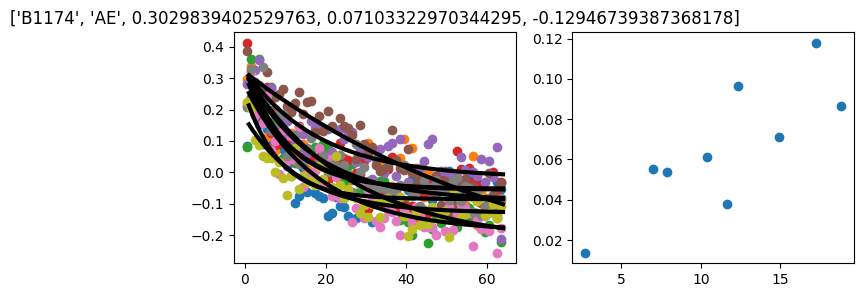

  5%|▌         | 1/20 [00:04<01:19,  4.18s/it]

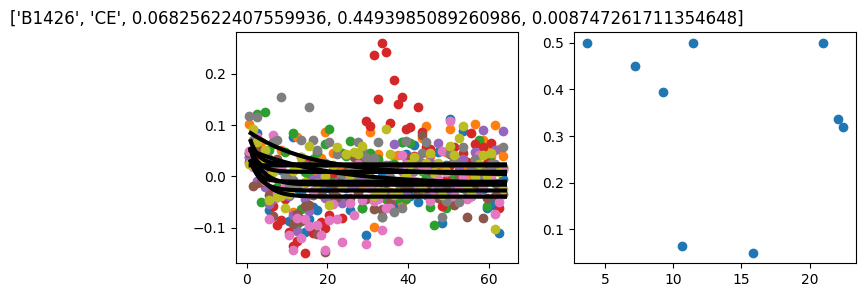

 10%|█         | 2/20 [00:08<01:18,  4.34s/it]

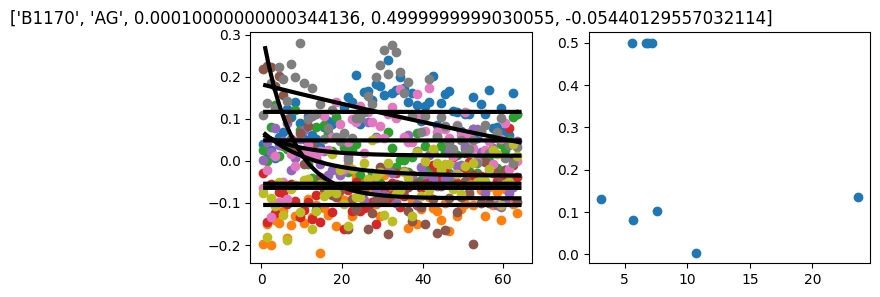

 15%|█▌        | 3/20 [00:14<01:23,  4.91s/it]

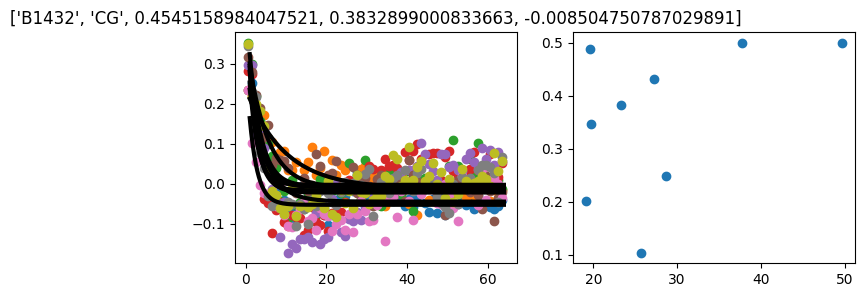

 20%|██        | 4/20 [00:21<01:33,  5.87s/it]

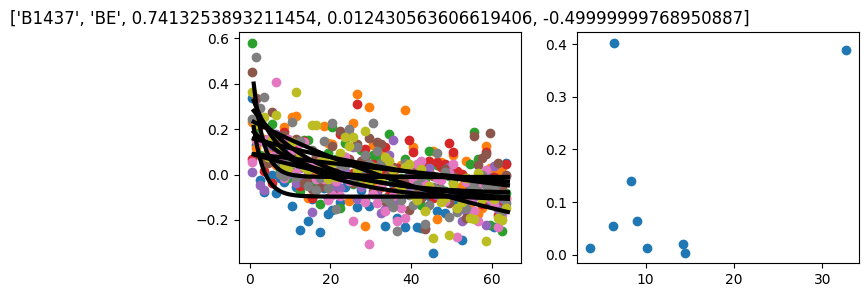

 25%|██▌       | 5/20 [00:24<01:12,  4.85s/it]

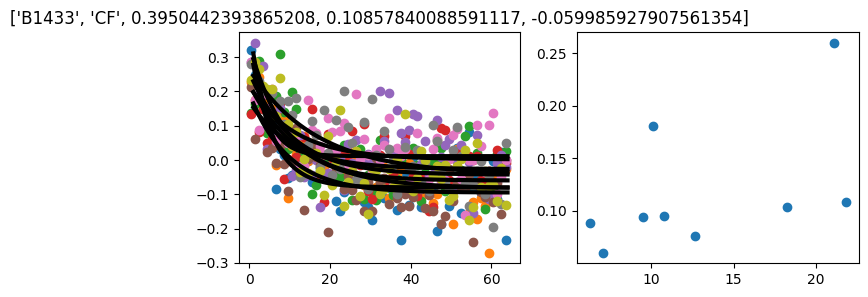

 30%|███       | 6/20 [00:27<00:59,  4.23s/it]

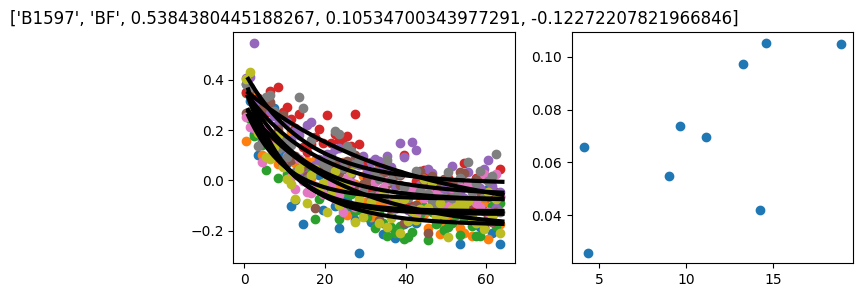

 35%|███▌      | 7/20 [00:30<00:50,  3.90s/it]

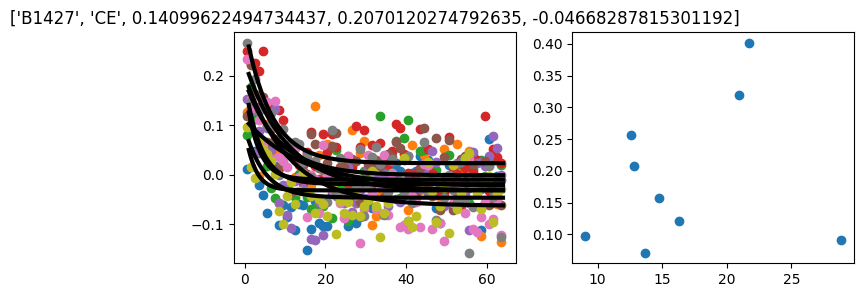

 40%|████      | 8/20 [00:35<00:49,  4.11s/it]

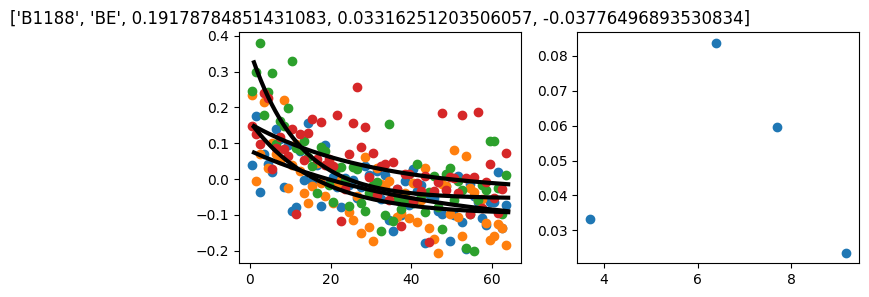

 45%|████▌     | 9/20 [00:36<00:36,  3.32s/it]

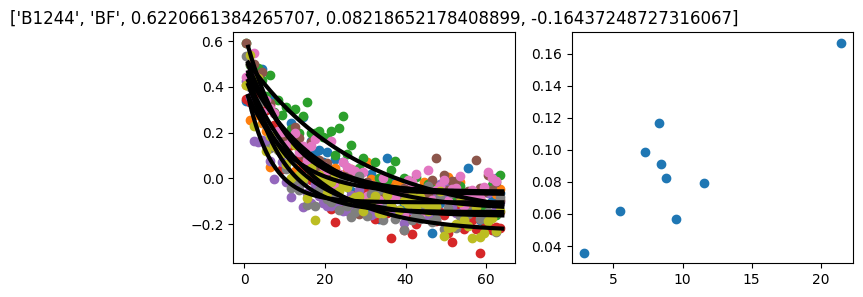

 50%|█████     | 10/20 [00:40<00:33,  3.35s/it]

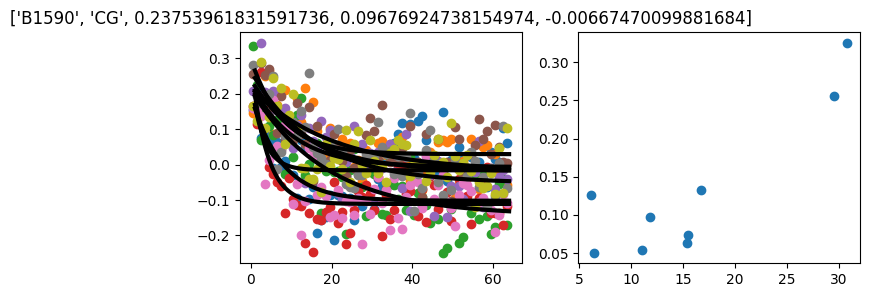

 55%|█████▌    | 11/20 [00:43<00:29,  3.31s/it]

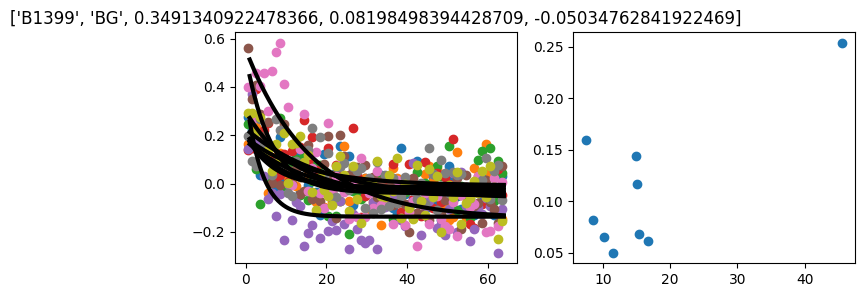

 60%|██████    | 12/20 [00:46<00:24,  3.11s/it]

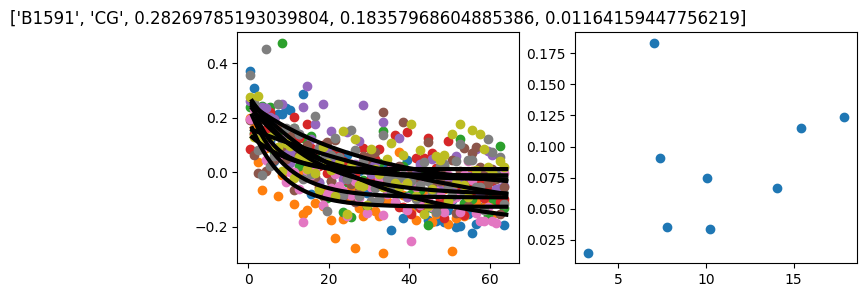

 65%|██████▌   | 13/20 [00:49<00:21,  3.02s/it]

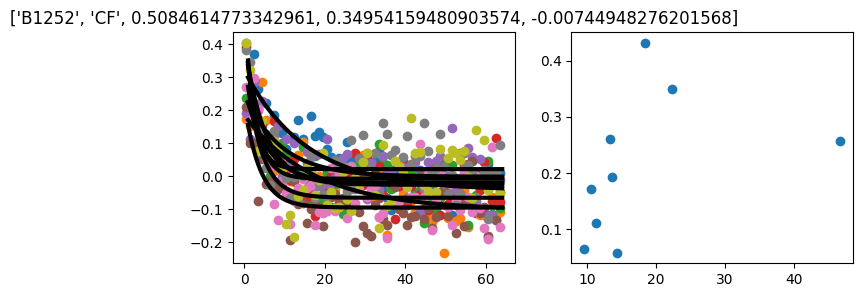

 70%|███████   | 14/20 [00:52<00:18,  3.10s/it]

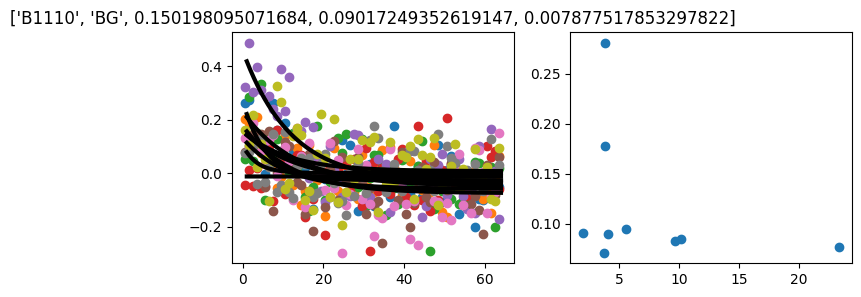

 75%|███████▌  | 15/20 [00:55<00:14,  2.97s/it]

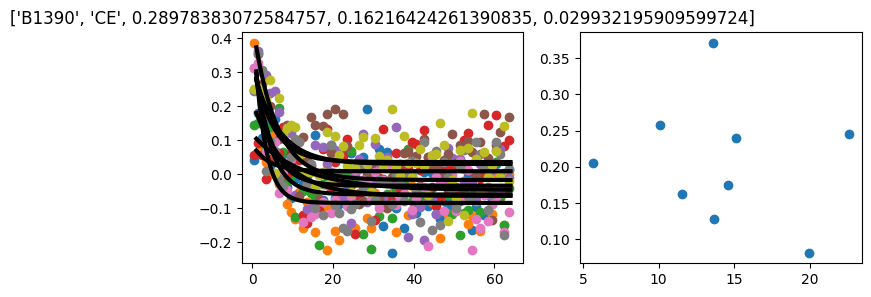

 80%|████████  | 16/20 [00:58<00:12,  3.00s/it]

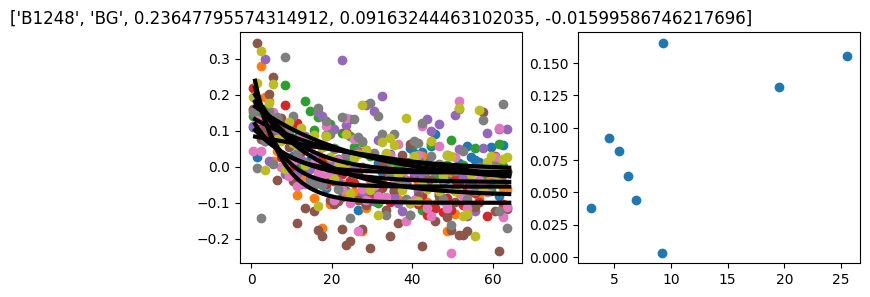

 85%|████████▌ | 17/20 [01:01<00:09,  3.13s/it]

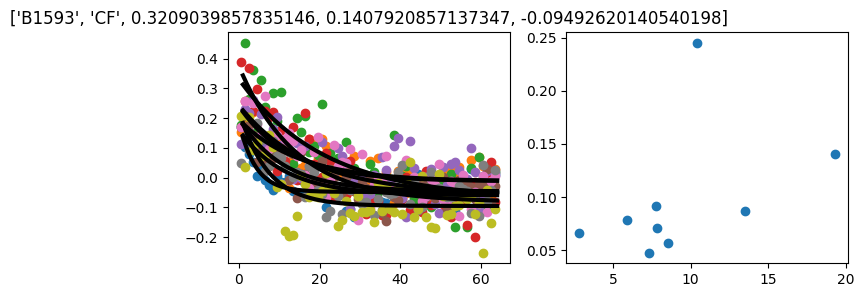

 90%|█████████ | 18/20 [01:05<00:06,  3.34s/it]

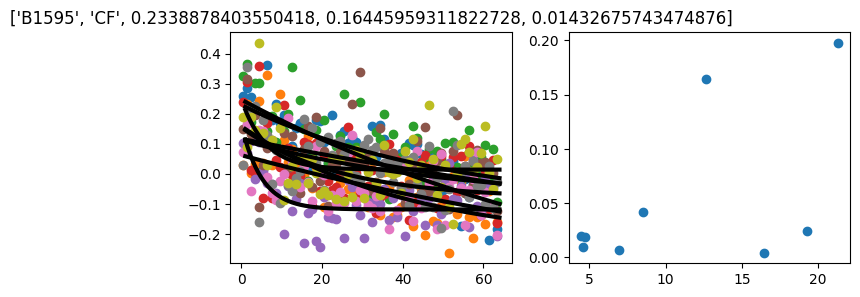

 95%|█████████▌| 19/20 [01:08<00:03,  3.30s/it]

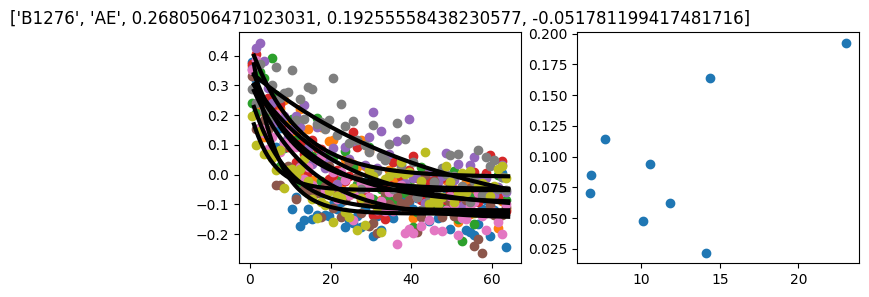

100%|██████████| 20/20 [01:11<00:00,  3.59s/it]


bird interpolation    e_init e_decay_const intercept  fit_slope fit_range  \
0  B1174            CF  0.335936      0.117928 -0.085412  17.269366  0.335936   
1  B1174            BF  0.365156      0.086452 -0.055953   18.84814  0.365156   
2  B1174            AG  0.540975      0.038066 -0.225412  11.653338  0.540975   

         r2  
0  0.006025  
1  0.008232  
2  0.018072

In [63]:
fit_dfs = []
for subject in tqdm(behav_data_all.subject.unique()):
    subject_data = behav_data_all[(behav_data_all.subject == subject)]
    fit_dfs_bird = []

    fig, axs = plt.subplots(ncols=2, figsize=(8, 3))

    for interpolation in subject_data.interpolation.unique():
        interpolation_data = subject_data[(subject_data.interpolation == interpolation)]
        unique_units = np.unique(interpolation_data[unit].values)

        interpolation_data["distance_from_boundary"] = np.abs(
            interpolation_data[unit].values - np.median(unique_units)
        )

        x = interpolation_data.distance_from_boundary.values.astype(float)
        y = interpolation_data[rt_column].values.astype(float)

        # fit model
        results_exp_min, e_init, e_decay_const, intercept = fit_decay(x, y)
        r2 = 1 - np.sum((results_exp_min.residual) ** 2) / np.sum((y - np.mean(y)) ** 2)

        # get model values for x
        x_model = np.linspace(0, int(len(unique_units) / 2), 1000)
        fit_y = exp_decay(x=x_model, p=results_exp_min.params)
        fit_range = fit_y[0] - intercept

        # plot
        x_model = np.linspace(1, int(len(unique_units) / 2), 500)

        fit_y = exp_decay(x=x_model, p=results_exp_min.params)
        binned_rt = (
            interpolation_data[["distance_from_boundary", rt_column]]
            .groupby("distance_from_boundary")
            .describe()[rt_column][["mean", "count", "std"]]
            .reset_index()
        )
        ax = axs[0]
        ax.scatter(binned_rt.distance_from_boundary.values, binned_rt["mean"].values)
        ax.set_title([subject, interpolation, e_init, e_decay_const, intercept])
        ax.plot(x_model, fit_y, color="k", lw=3)
        # ax.set_ylim([0,2])

        fit_slope = fit_df_interp[
            (fit_df_interp.cue == "NC")
            & (fit_df_interp.bird == subject)
            & (fit_df_interp.interp == interpolation)
        ]._slope.values[0]
        fit_df = pd.Series(
            {
                "bird": subject,
                "interpolation": interpolation,
                "e_init": e_init,
                "e_decay_const": e_decay_const,
                "intercept": intercept,
                "fit_slope": fit_slope,
                "fit_range": fit_range,
                "r2": r2,
            }
        )
        fit_dfs_bird.append(fit_df)

    fit_df_bird = pd.concat(fit_dfs_bird, axis=1).T

    axs[1].scatter(fit_df_bird.fit_slope.values, fit_df_bird.e_decay_const.values)

    plt.show()

    fit_dfs.append(fit_df_bird)
fit_df = pd.concat(fit_dfs)
fit_df[:3]

In [64]:
fit_df[:3]

bird interpolation    e_init e_decay_const intercept  fit_slope fit_range  \
0  B1174            CF  0.335936      0.117928 -0.085412  17.269366  0.335936   
1  B1174            BF  0.365156      0.086452 -0.055953   18.84814  0.365156   
2  B1174            AG  0.540975      0.038066 -0.225412  11.653338  0.540975   

         r2  
0  0.006025  
1  0.008232  
2  0.018072

In [65]:
len(fit_df)

175

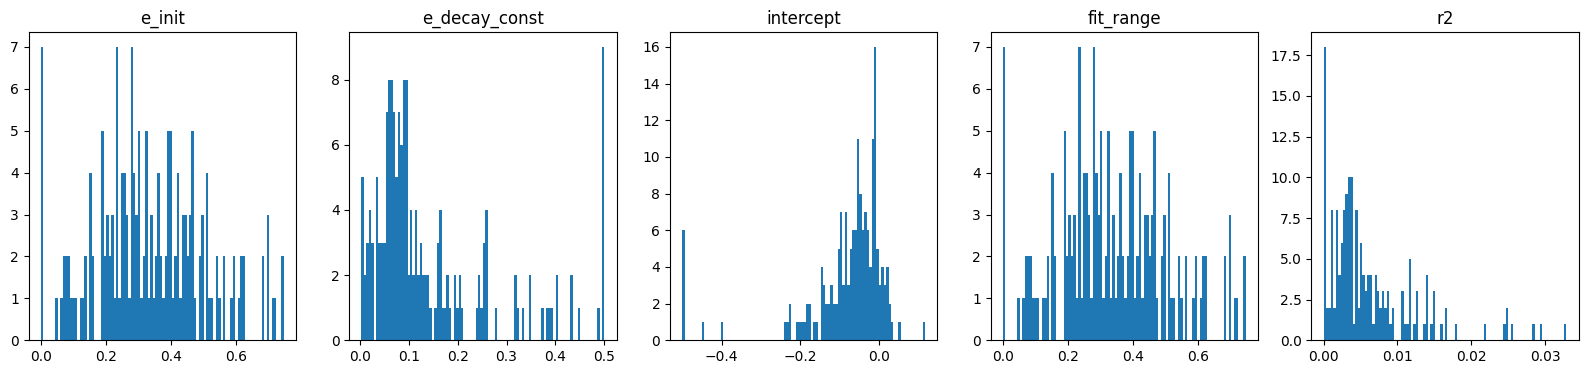

In [66]:
fig, axs = plt.subplots(ncols=5, figsize=(20,4))

for axi, param in enumerate(['e_init', 'e_decay_const', 'intercept', 'fit_range', 'r2']):
    ax = axs[axi]
    ax.set_title(param)
    x = fit_df.fit_slope.values
    y = fit_df[param].values
    ax.hist(y, bins=100)

In [67]:
birds_without_rts = ['B1426', '1170']
#birds_without_rts = ['B1426',  'B1170', 'B1427', 'B1188', 'B1437']

In [68]:
# normalize log slope by bird, and decay constant by bird
for bird in fit_df.bird.unique():
    m = fit_df.bird == bird
    fit_df.loc[m, 'fit_slope_z'] = z_score(np.log(fit_df[m].fit_slope.values.astype(float)))
    fit_df.loc[m, 'e_decay_const_z'] = z_score(fit_df[m].e_decay_const.values.astype(float))

In [69]:
from cdcp.visualization.utils import get_cat_colors

In [70]:
# remove interpolations without good decay, and birds with no difference in RT
m = (fit_df.fit_range > 0.1) & (fit_df.bird.isin(birds_without_rts) == False) & (fit_df.r2 > 0.001)
fit_df_masked = fit_df[m]

In [71]:
# this percent of interpolations were discluded because we failed to fit a decay
len(fit_df), np.sum(m), np.sum(m)/ len(fit_df)

(175, 153, 0.8742857142857143)

In [72]:
fit_df_masked.interpolation.values

array(['CF', 'BF', 'AG', 'CG', 'CE', 'BE', 'AF', 'BG', 'AE', 'AE', 'CF',
       'AG', 'BE', 'CE', 'BF', 'CF', 'BG', 'AE', 'AF', 'CG', 'AE', 'BF',
       'CE', 'CF', 'AG', 'CG', 'AF', 'BG', 'BE', 'AF', 'AG', 'BG', 'CG',
       'BF', 'AE', 'BE', 'CE', 'CF', 'CF', 'AG', 'AF', 'BE', 'CE', 'BG',
       'AE', 'CG', 'BF', 'BE', 'BG', 'CG', 'AG', 'AE', 'AF', 'AE', 'AF',
       'BF', 'BE', 'AG', 'BG', 'BE', 'AF', 'AE', 'CE', 'CG', 'CF', 'BF',
       'AE', 'BE', 'AF', 'BF', 'AG', 'CE', 'CF', 'BG', 'CG', 'CG', 'CE',
       'AE', 'AG', 'BF', 'AF', 'CF', 'BE', 'BG', 'AF', 'BF', 'AE', 'BE',
       'BG', 'CE', 'CF', 'AG', 'CG', 'BE', 'AG', 'BG', 'CG', 'CE', 'AE',
       'AF', 'BF', 'CF', 'AE', 'BF', 'AF', 'CF', 'CG', 'AG', 'BG', 'AG',
       'BF', 'CF', 'BG', 'BE', 'AF', 'CG', 'CE', 'AE', 'BF', 'BE', 'AF',
       'CE', 'CF', 'CG', 'AG', 'BG', 'BF', 'BE', 'BG', 'AG', 'CE', 'AF',
       'CG', 'AE', 'CF', 'BE', 'AG', 'CE', 'BG', 'AE', 'BF', 'AF', 'CG',
       'CF', 'CF', 'BG', 'AG', 'CG', 'CE', 'BF', 'A

In [73]:
colors, pal, pal_dict = get_cat_colors(fit_df_masked.interpolation.values)

In [74]:
pal_dict = {'AE': np.array([0.12156863, 0.46666667, 0.70588235]),
 'AF': np.array([0.58039216, 0.40392157, 0.74117647]),
 'AG': np.array([0.83921569, 0.15294118, 0.15686275]),
 'BE': np.array([0.7372549 , 0.74117647, 0.13333333]),
 'BF': np.array([0.49803922, 0.49803922, 0.49803922]),
 'BG': np.array([0.54901961, 0.3372549 , 0.29411765]),
 'CE': np.array([0.89019608, 0.46666667, 0.76078431]),
 'CF': np.array([0.17254902, 0.62745098, 0.17254902]),
 'CG': np.array([1.        , 0.49803922, 0.05490196])}

In [75]:
colors = [pal_dict[i] for i in fit_df_masked.interpolation.values]

In [76]:
x = fit_df_masked["fit_slope_z"].values.astype(float)
y = fit_df_masked["e_decay_const_z"].values.astype(float)

In [77]:
len(x)

153

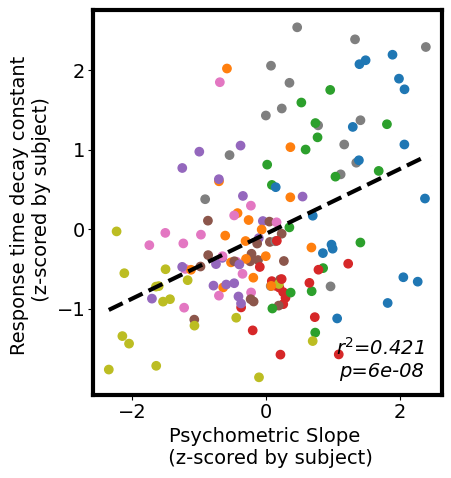

In [78]:
fig, ax = plt.subplots(figsize=(4.5,5))
ax.scatter(x, y, c = colors)
ax.set_xlabel('Psychometric Slope \n (z-scored by subject)', fontsize=14)
ax.set_ylabel('Response time decay constant \n (z-scored by subject)', fontsize=14)
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("k")
ax.tick_params(axis="both", labelsize=14, pad=15)

m, b = np.polyfit(x, y, 1)

x_line = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x_line, m*x_line + b, color ='k', ls='dashed', lw=3)

correlation_sigma, p_value_sigma = scipy.stats.pearsonr(x,y)

ax.text(
    0.95,
    0.15,
    "r$^2$={}\np={:g}".format(round(correlation_sigma, 3), float('{:.1g}'.format(p_value_sigma))),
    horizontalalignment="right",
    verticalalignment="top",
    fontsize=14,
    color='k',
    #fontweight='bold',
    style='italic',
    transform=ax.transAxes
);
ax.set_yticks([-1, 0, 1, 2])
ax.yaxis.labelpad = 4
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(2.)
ax.xaxis.labelpad = 4
for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(2.)

if SAVE_FIGS:
    ensure_dir(FIGURE_DIR / 'behavioral_results')
    save_fig(FIGURE_DIR / 'behavioral_results' / 'response-time-vs-psychometric', save_pdf=True)
    plt.show()

### Response time by cue class

In [79]:
behav_data_all[:3]

session index       type_  \
time                                                   
2019-04-12 07:22:03.913804       1     1      normal   
2019-04-12 07:59:15.341180       1    10      normal   
2019-04-12 08:00:21.438401       1    13  correction   

                                                                     stimulus  \
time                                                                            
2019-04-12 07:22:03.913804  /home/bird/opdat/B1174/stimuli/CF/NC/NC_CF_091...   
2019-04-12 07:59:15.341180  /home/bird/opdat/B1174/stimuli/BF/NC/NC_BF_018...   
2019-04-12 08:00:21.438401  /home/bird/opdat/B1174/stimuli/AG/NC/NC_AG_036...   

                           class_ response correct        rt  reward punish  \
time                                                                          
2019-04-12 07:22:03.913804      L        L    True  1.607013    True  False   
2019-04-12 07:59:15.341180      R        R    True  0.687282   False  False   
2019-04-12 08:00:21.438401      R        R    True  1.778613   False  False   

                           cue_class cue_id  cue_prob num_stims flip_cues  \
time                                                                        
2019-04-12 07:22:03.913804        NC     NC       0.5         3     False   
2019-04-12 07:59:15.341180        NC     NC       0.5         3     False   
2019-04-12 08:00:21.438401        NC     NC       0.5         3     False   

                           binary_choice cueing left_stim right_stim  \
time                                                                   
2019-04-12 07:22:03.913804         False  False         C          F   
2019-04-12 07:59:15.341180         False  False         B          F   
2019-04-12 08:00:21.438401         False  False         A          G   

                           interpolation_point  prob_cue  prob_cued_no_cue  \
time                                                                         
2019-04-12 07:22:03.913804                  36       0.0               0.0   
2019-04-12 07:59:15.341180                 109       0.0               0.0   
2019-04-12 08:00:21.438401                  91       0.0               0.0   

                                                                    data_file  \
time                                                                            
2019-04-12 07:22:03.913804  /mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...   
2019-04-12 07:59:15.341180  /mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...   
2019-04-12 08:00:21.438401  /mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...   

                            response_bool interpolation  pos_bin  \
time                                                               
2019-04-12 07:22:03.913804              0            CF        9   
2019-04-12 07:59:15.341180              1            BF       27   
2019-04-12 08:00:21.438401              1            AG       23   

                           cue_direction subject self_initiated  \
time                                                              
2019-04-12 07:22:03.913804             N   B1174            NaN   
2019-04-12 07:59:15.341180             N   B1174            NaN   
2019-04-12 08:00:21.438401             N   B1174            NaN   

                            normed_rt_time  normed_rt_class  \
time                                                          
2019-04-12 07:22:03.913804        3.282376         2.798283   
2019-04-12 07:59:15.341180        0.686127         1.308388   
2019-04-12 08:00:21.438401        4.564390         4.988912   

                            normed_rt_side_cue  normed_rt_side_and_cue  \
time                                                                     
2019-04-12 07:22:03.913804            2.987800                2.495150   
2019-04-12 07:59:15.341180            0.720871                1.138091   
2019-04-12 08:00:21.438401            4.599134                4.818614   

                            interpol

In [80]:
behav_data_all[(behav_data_all.rt == 0.078940) & (behav_data_all.subject == "B1174") & (behav_data_all.interpolation == "AE")]

session index   type_  \
time                                               
2019-12-24 14:44:30.569983     709    52  normal   
2020-01-16 14:59:45.107639    1003    30  normal   
2020-02-02 17:14:37.167297    1239    73  normal   

                                                                     stimulus  \
time                                                                            
2019-12-24 14:44:30.569983  /home/bird/opdat/B1174/stimuli/AE/CL1/CL1_AE_1...   
2020-01-16 14:59:45.107639  /home/bird/opdat/B1174/stimuli/AE/CL0/CL0_AE_1...   
2020-02-02 17:14:37.167297  /home/bird/opdat/B1174/stimuli/AE/NC/NC_AE_108...   

                           class_ response correct       rt  reward punish  \
time                                                                         
2019-12-24 14:44:30.569983      L        L    True  0.07894   False  False   
2020-01-16 14:59:45.107639      L        L    True  0.07894    True  False   
2020-02-02 17:14:37.167297      L        L    True  0.07894   False  False   

                           cue_class cue_id  cue_prob num_stims flip_cues  \
time                                                                        
2019-12-24 14:44:30.569983        CL    CL1     0.875         3     False   
2020-01-16 14:59:45.107639        CL    CL0     0.750         3     False   
2020-02-02 17:14:37.167297        NC     NC     0.500         3     False   

                           binary_choice cueing left_stim right_stim  \
time                                                                   
2019-12-24 14:44:30.569983         False   True         A          E   
2020-01-16 14:59:45.107639         False   True         A          E   
2020-02-02 17:14:37.167297         False   True         A          E   

                           interpolation_point  prob_cue  prob_cued_no_cue  \
time                                                                         
2019-12-24 14:44:30.569983                  20       0.8               0.2   
2020-01-16 14:59:45.107639                  15       0.8               0.2   
2020-02-02 17:14:37.167297                  19       0.8               0.2   

                                                                    data_file  \
time                                                                            
2019-12-24 14:44:30.569983  /mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...   
2020-01-16 14:59:45.107639  /mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...   
2020-02-02 17:14:37.167297  /mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...   

                            response_bool interpolation  pos_bin  \
time                                                               
2019-12-24 14:44:30.569983              0            AE        5   
2020-01-16 14:59:45.107639              0            AE        4   
2020-02-02 17:14:37.167297              0            AE        5   

                           cue_direction subject self_initiated  \
time                                                              
2019-12-24 14:44:30.569983             L   B1174            NaN   
2020-01-16 14:59:45.107639             L   B1174            NaN   
2020-02-02 17:14:37.167297             N   B1174            NaN   

                            normed_rt_time  normed_rt_class  \
time                                                          
2019-12-24 14:44:30.569983       -0.370744          -0.9283   
2020-01-16 14:59:45.107639       -0.540281          -0.9283   
2020-02-02 17:14:37.167297       -0.487852          -0.9283   

                            normed_rt_side_cue  normed_rt_side_and_cue  \
time                                                                     
2019-12-24 14:44:30.569983           -0.239656               -0.732027   
2020-01-16 14:59:45.107639           -0.422317               -0.763115   
2020-02-02 17:14:37.167297           -0.782428               -1.231433   

                            interpolation_bin  
time         

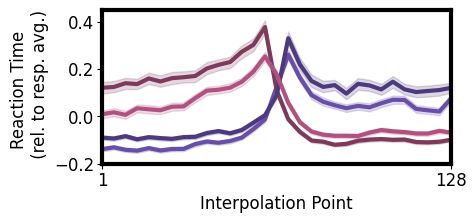

In [81]:
fig, ax = plt.subplots(figsize=(4.5,2))
sns.lineplot(
    x="interpolation_bin",
    y="normed_rt_class",
    hue="cue_id",
    data=behav_data_all[behav_data_all.cue_class.isin(["CL", "CR"])],
    #order = ['CL1', 'CL0', 'CR1', 'CR0'],
    palette = cdcp_colors["cue_pal"],
    #ci=None,
    legend=False,
    ax = ax,
    lw=3
)

for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("k")
ax.tick_params(axis="both", labelsize=12, pad=15)

ax.set_xticks([1, 31])
ax.set_xticklabels([1, 128])
ax.set_xlabel('Interpolation Point', fontsize=12)
ax.set_ylabel('Reaction Time \n (rel. to resp. avg.)', fontsize=12)
ax.yaxis.labelpad = 4
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(2.)
ax.xaxis.labelpad = 4
for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(2.)

    
ax.set_xlim([1,31])
ax.set_ylim([-0.2, 0.45])

if SAVE_FIGS:
    ensure_dir(FIGURE_DIR / 'behavioral_results')
    save_fig(FIGURE_DIR / 'behavioral_results' / 'response-time-vs-cue-prob-short', save_pdf=True)
    plt.show()

### Contrast with prior probability

In [82]:
from joblib import Parallel, delayed
from cdcp.behavior.bayesian import fit_bayesian_model, bayesian_model

In [83]:
params = {
    'sigma_likelihood':10, # std of gaussian for likelihood
    'beta_categorical_attention': 0, # pct of time ignoring the categorical stimulus # if set at 0 all guesses are based upon the cue, 
    'delta_cue_attention':.1, # pct of time ignoring the cue
    'alpha_overall_attention':.2, # pct of time ingoring both the cue, and categorical stimulis, independant of the product of beta and delta 
    'gamma_side_bias': .5 # the direction of the random guess (side bias)
}

In [84]:
x_true = np.arange(128)
decision_boundary = np.zeros(len(x_true))
decision_boundary[x_true > 63] = 1

In [85]:
condition_types = [0.125, 0.25, 0.5, 0.75, 0.875]
midpoint = 63
prior_probability = {ct: np.zeros(len(x_true))+ct for ct in condition_types}
for ct in condition_types: prior_probability[ct][x_true > midpoint]  = 1-ct 

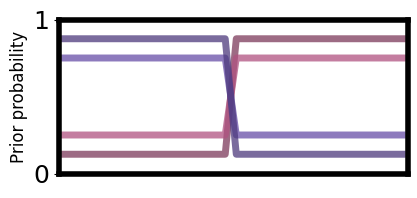

In [86]:
fig, ax = plt.subplots(figsize=(4.5,2))

cue_plots = []

# plot
for ct in [0.125, 0.25, 0.75, 0.875]:
    decision, posterior_probability, likelihood = bayesian_model(params, x_true, prior_probability[ct], decision_boundary)
    ax.plot(x_true[::4],prior_probability[ct][::4], color = cdcp_colors['cue']['L'][ct], label = ct, lw = 5, alpha = 0.75)

#ax.set_xlabel('Interpolation point ($x_{true}$)')
ax.set_xticks([], [])
ax.set_yticks([0,1])

ax.set_ylabel('Prior probability', fontsize=12)
[i.set_linewidth(4) for i in ax.spines.values()]
plt.tick_params(axis='both', which='major', labelsize=18)

ax.set_xlim([0,126])   
ax.set_ylim([0,1])
# legends
#ax.legend()

if SAVE_FIGS:
    ensure_dir(FIGURE_DIR / 'behavioral_results')
    save_fig(FIGURE_DIR / 'behavioral_results' / 'prior_short', save_pdf=True)
    plt.show()


### Correlation between reaction time and prior probability for each interpolation point

In [87]:
behav_data_all[:3]

session index       type_  \
time                                                   
2019-04-12 07:22:03.913804       1     1      normal   
2019-04-12 07:59:15.341180       1    10      normal   
2019-04-12 08:00:21.438401       1    13  correction   

                                                                     stimulus  \
time                                                                            
2019-04-12 07:22:03.913804  /home/bird/opdat/B1174/stimuli/CF/NC/NC_CF_091...   
2019-04-12 07:59:15.341180  /home/bird/opdat/B1174/stimuli/BF/NC/NC_BF_018...   
2019-04-12 08:00:21.438401  /home/bird/opdat/B1174/stimuli/AG/NC/NC_AG_036...   

                           class_ response correct        rt  reward punish  \
time                                                                          
2019-04-12 07:22:03.913804      L        L    True  1.607013    True  False   
2019-04-12 07:59:15.341180      R        R    True  0.687282   False  False   
2019-04-12 08:00:21.438401      R        R    True  1.778613   False  False   

                           cue_class cue_id  cue_prob num_stims flip_cues  \
time                                                                        
2019-04-12 07:22:03.913804        NC     NC       0.5         3     False   
2019-04-12 07:59:15.341180        NC     NC       0.5         3     False   
2019-04-12 08:00:21.438401        NC     NC       0.5         3     False   

                           binary_choice cueing left_stim right_stim  \
time                                                                   
2019-04-12 07:22:03.913804         False  False         C          F   
2019-04-12 07:59:15.341180         False  False         B          F   
2019-04-12 08:00:21.438401         False  False         A          G   

                           interpolation_point  prob_cue  prob_cued_no_cue  \
time                                                                         
2019-04-12 07:22:03.913804                  36       0.0               0.0   
2019-04-12 07:59:15.341180                 109       0.0               0.0   
2019-04-12 08:00:21.438401                  91       0.0               0.0   

                                                                    data_file  \
time                                                                            
2019-04-12 07:22:03.913804  /mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...   
2019-04-12 07:59:15.341180  /mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...   
2019-04-12 08:00:21.438401  /mnt/cube/RawData/Magpi/B1174/B1174_trialdata_...   

                            response_bool interpolation  pos_bin  \
time                                                               
2019-04-12 07:22:03.913804              0            CF        9   
2019-04-12 07:59:15.341180              1            BF       27   
2019-04-12 08:00:21.438401              1            AG       23   

                           cue_direction subject self_initiated  \
time                                                              
2019-04-12 07:22:03.913804             N   B1174            NaN   
2019-04-12 07:59:15.341180             N   B1174            NaN   
2019-04-12 08:00:21.438401             N   B1174            NaN   

                            normed_rt_time  normed_rt_class  \
time                                                          
2019-04-12 07:22:03.913804        3.282376         2.798283   
2019-04-12 07:59:15.341180        0.686127         1.308388   
2019-04-12 08:00:21.438401        4.564390         4.988912   

                            normed_rt_side_cue  normed_rt_side_and_cue  \
time                                                                     
2019-04-12 07:22:03.913804            2.987800                2.495150   
2019-04-12 07:59:15.341180            0.720871                1.138091   
2019-04-12 08:00:21.438401            4.599134                4.818614   

                            interpol

In [88]:
p_dict = {
    'L': {
        'CL1':0.875, 'NC':0.5, 'CL0':0.75, 'CR1':0.125, 'CR0':0.25, 'CN':0.5
    },
    'R': {
        'CL1':0.125, 'NC':0.5, 'CL0':0.25, 'CR1':0.875, 'CR0':0.75, 'CN':0.5
    }
}

In [89]:
behav_data_all.cue_id.unique()

array(['NC', 'CL0', 'CN', 'CR1', 'CL1', 'CR0'], dtype=object)

In [90]:
len(behav_data_all)

4209025

In [91]:
def get_dict(class_, id_):
    return p_dict[class_][id_]
cued_class_prob = behav_data_all.apply(lambda row: get_dict(row['class_'], row['cue_id']), axis=1).values

In [92]:
np.unique(cued_class_prob, return_counts=True)

(array([0.125, 0.25 , 0.5  , 0.75 , 0.875]),
 array([ 219151,  413826,  938397, 1216650, 1421001]))

In [93]:
{i:np.mean(behav_data_all.normed_rt_class.values[cued_class_prob == i]) for i in np.unique(cued_class_prob)}

{0.125: 0.1736825008053554,
 0.25: 0.0834441876505709,
 0.5: 0.15004290997722267,
 0.75: -0.08106211304546665,
 0.875: -0.08076677278186885}

In [94]:
x = cued_class_prob

In [95]:
y = behav_data_all.normed_rt_class.values

In [96]:
len(x)

4209025

In [97]:
scipy.stats.pearsonr(x,y)

PearsonRResult(statistic=-0.091736682069756, pvalue=0.0)